In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [103]:
url="https://raw.githubusercontent.com/sumeet-ranjan/pub/master/bank-additional-full.csv"
df = pd.read_csv(url,delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#Available features

###Bank client data:



*   Age (numeric)
*   Job (categorical)
*   Marital (categorical)
*   Education (categorical)
*   Default (categorical)
* Housing *loan* (categorical)
* Personal *Loan* (categorical)

###Last contact of current campaign:

*   Contact (categorical)
*   Month (categorical)
*   Day_of_week (categorical)
*   Duration (numeric)

###Other attributes:

*   Campaign (numeric) 
*   Pdays (numeric)
* Previous (numeric)
*   Poutcome (categorical)

###Social and economic context attributes

*   Emp.var.rate (numeric)
*   Cons.price.idx  (numeric)
*   Cons.conf.idx (numeric)
*   Euribor3m (numeric)
*   Nr.employed (numeric)

###Target variable:

*   y : binary {'yes', 'no'}

#**Exploratory Data Analysis**

##**a) Discrete Variables**

In [104]:
#Checking if our Data has any NULL Values?
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [105]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [106]:
df['y'] = pd.to_numeric(df.replace({'y':{'yes':1,'no':0}})['y'])
#Replace Categorical Columns with 'yes' / 'no' with boolean 1 and 0
#df['default'] = df['default'].replace('unknown', 0)
#df['default'] = (df.replace({'default':{'yes':1,'no':-1}})['default']).astype(int)
#df['housing'] = df['housing'].replace('unkown', 0)
#df['housing'] = (df.replace({'housing':{'yes':1,'no':-1}})['housing']).astype(int)
#df['loan'] = df['loan'].replace('unknown', 0)
#df['loan'] = (df.replace({'loan':{'yes':1,'no':-1}})['loan']).astype(int)

In [107]:
#List of Categorical Columns and number of uniqu values

print('No. of Unique Values in Each Column:\n')
for col in df.columns:
    #Unique Value of each column
    unique_values = pd.unique(df[col].dropna())
    
    if len(unique_values)<=42:    
        print(f'{col} : %d'%len(unique_values))
        print('Values: ',end='')
        print(unique_values)
        print('\n')
    else:
       print(f'{col} : %d \n'%len(unique_values)) 

No. of Unique Values in Each Column:

age : 78 

job : 12
Values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


marital : 4
Values: ['married' 'single' 'divorced' 'unknown']


education : 8
Values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


default : 3
Values: ['no' 'unknown' 'yes']


housing : 3
Values: ['no' 'yes' 'unknown']


loan : 3
Values: ['no' 'yes' 'unknown']


contact : 2
Values: ['telephone' 'cellular']


month : 10
Values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


day_of_week : 5
Values: ['mon' 'tue' 'wed' 'thu' 'fri']


duration : 1544 

campaign : 42
Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]


pdays : 27
Values: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15 

In [108]:
#Datatype of each column
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

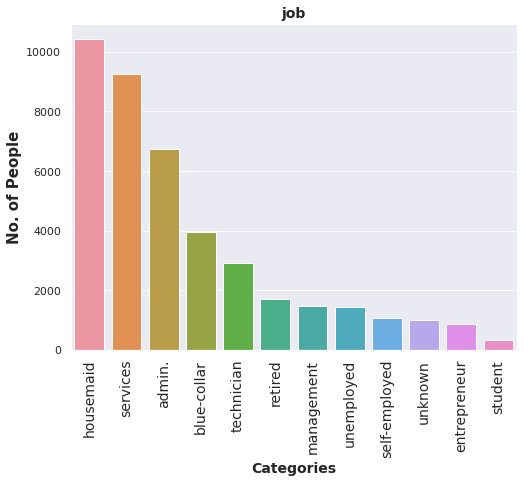

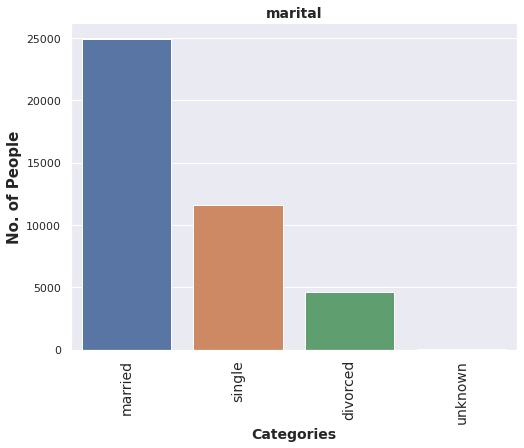

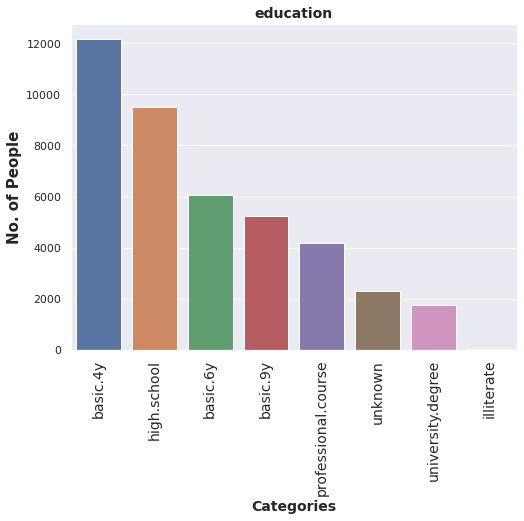

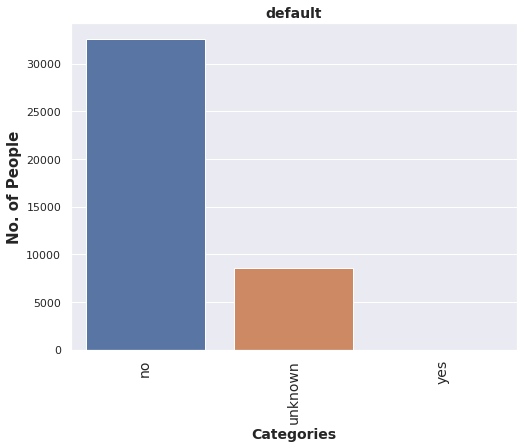

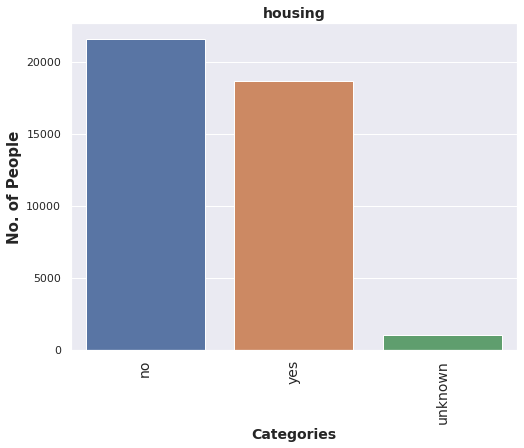

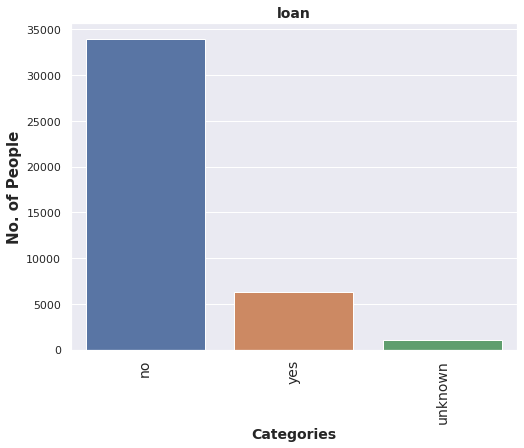

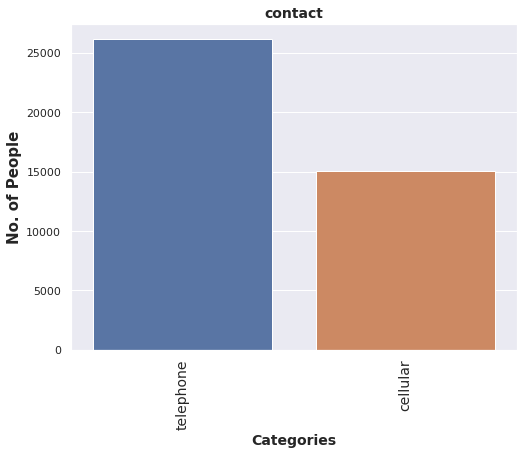

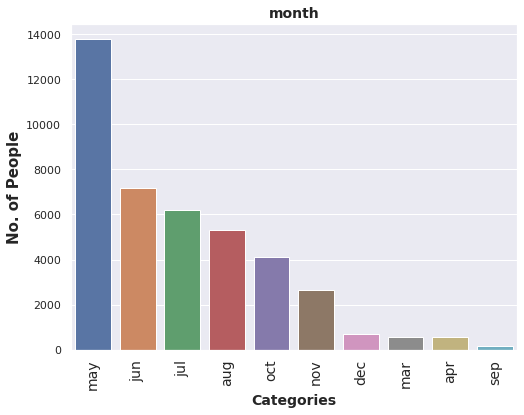

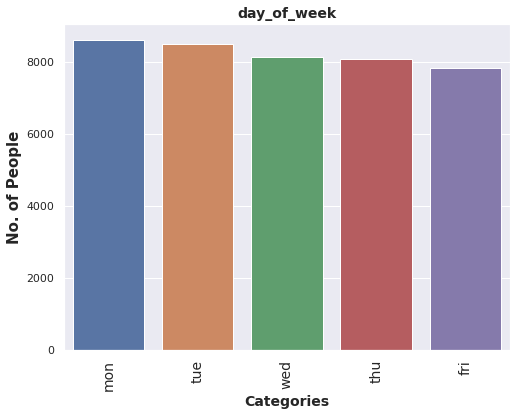

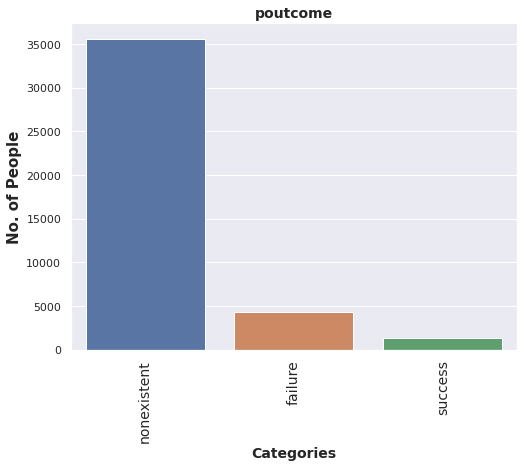

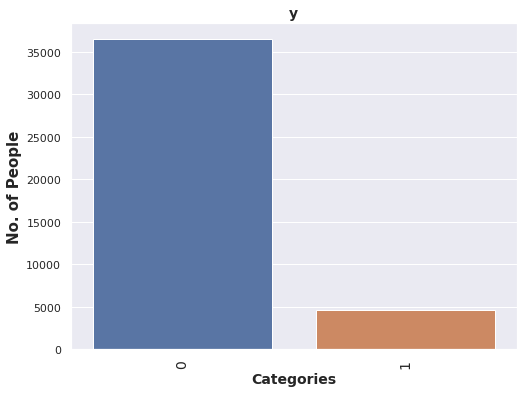

In [109]:
#Plotting Barplots for each Categorical Column
for col in cat_columns:
    plt.subplots(figsize=(8,6))
    sns.barplot(x=pd.unique(df[col].dropna()),y=df[col].dropna().value_counts())
    
    plt.xticks(rotation=90, size=14)
    plt.xlabel('Categories', fontweight='bold',size=14)
    plt.ylabel('No. of People', fontweight='bold', size=15)
    plt.title(f'{col}', fontweight='bold', size=14)
    plt.show()

In [110]:
cat_columns= ['job','marital','education','default','housing','loan','contact',\
              'month','day_of_week','poutcome','y']

#Entropy of the given Data 
for col in cat_columns:
    frequency = df[col].dropna().value_counts()
    N = sum(frequency)
    entropy = sum(-frequency*np.log(frequency/N)/N)
    print(f'Entropy of {col}: %f'%entropy) 

Entropy of job: 2.065507
Entropy of marital: 0.917874
Entropy of education: 1.772130
Entropy of default: 0.513013
Entropy of housing: 0.787205
Entropy of loan: 0.534987
Entropy of contact: 0.656380
Entropy of month: 1.836118
Entropy of day_of_week: 1.608810
Entropy of poutcome: 0.474584
Entropy of y: 0.352029


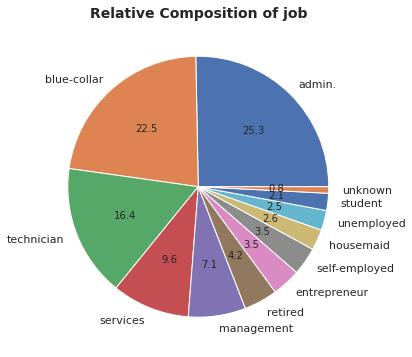

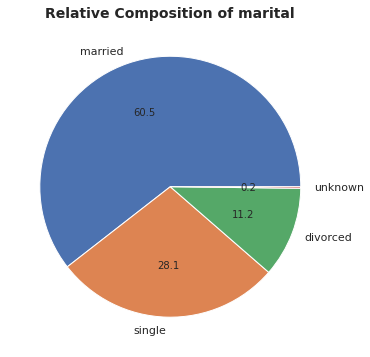

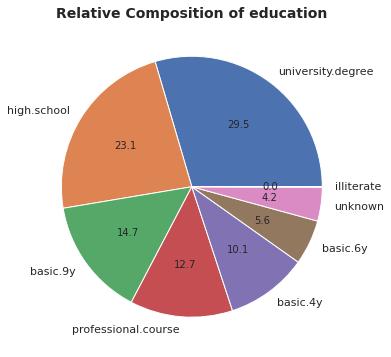

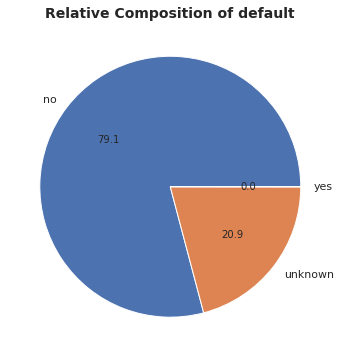

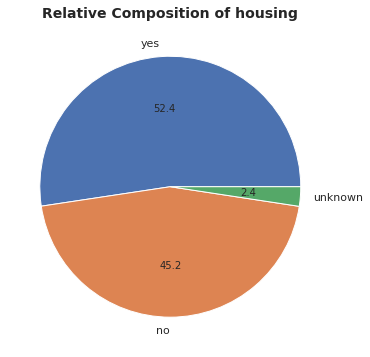

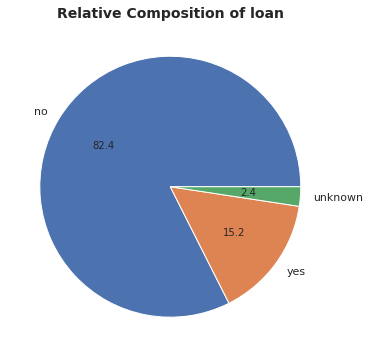

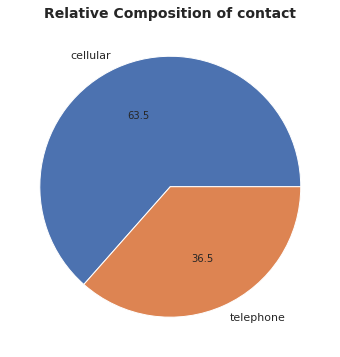

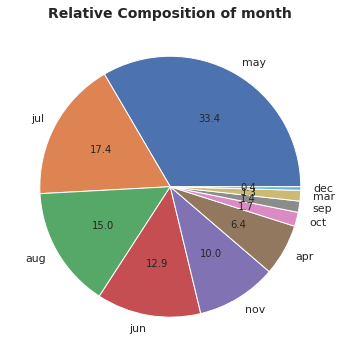

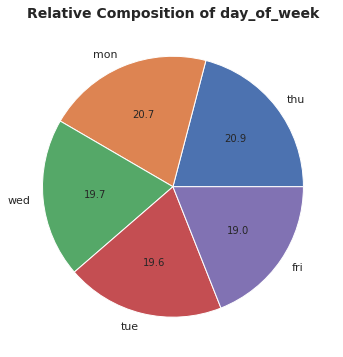

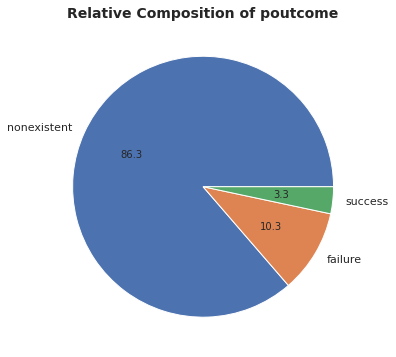

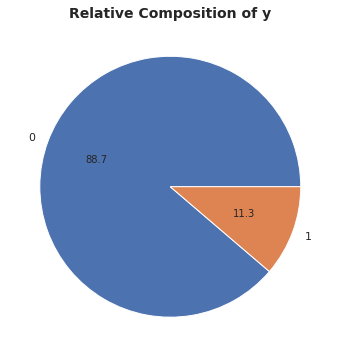

In [111]:
#Relative composition of each categorical variable
for col in cat_columns:
    plt.subplots(figsize=(8,6))
    plt.pie(df[col].value_counts(), labels = df[col].value_counts().index, autopct ='%1.1f')
    plt.title(f'Relative Composition of {col}', fontweight = 'bold', size=14)
    plt.show()

##**b)Continuous Variables**

In [112]:
conti_columns = ['age','duration','campaign','pdays','previous','emp.var.rate',\
                 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

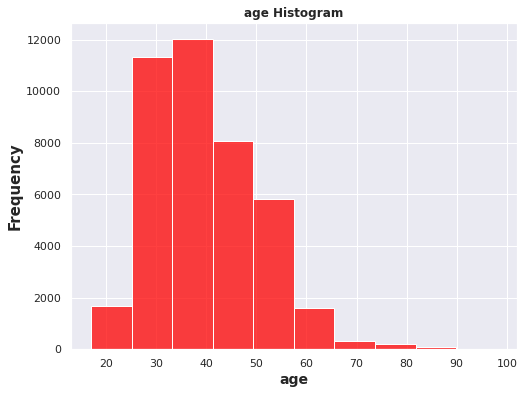

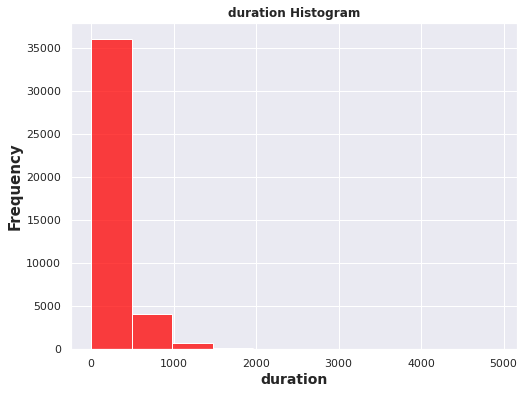

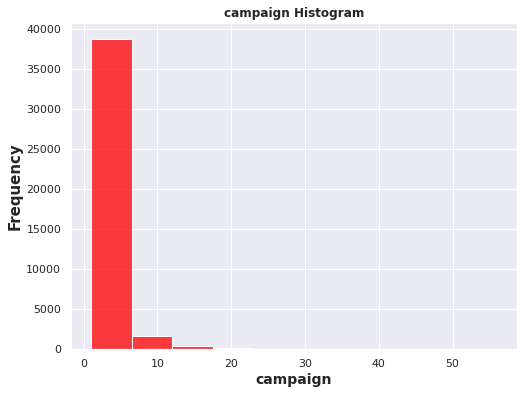

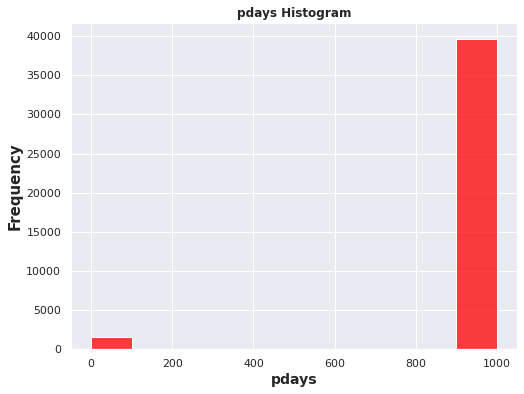

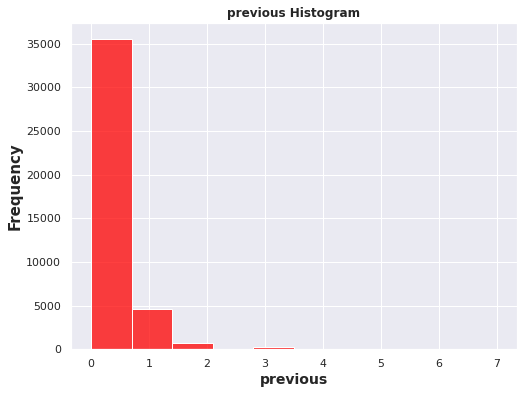

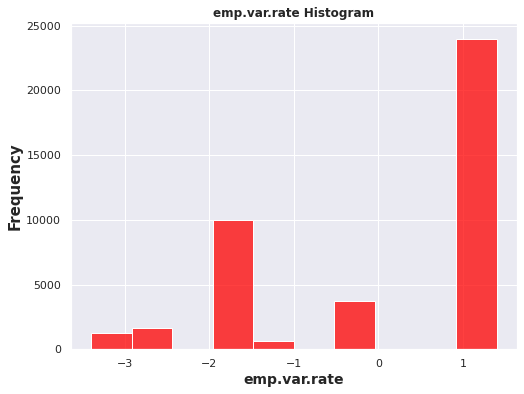

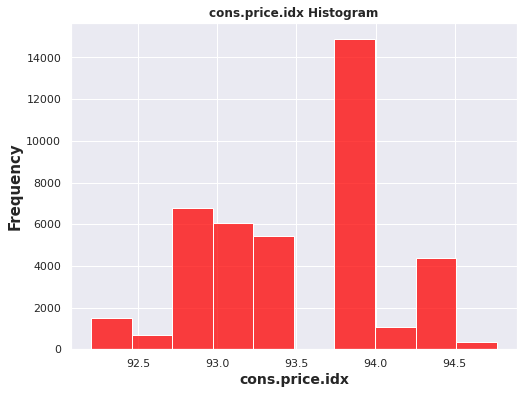

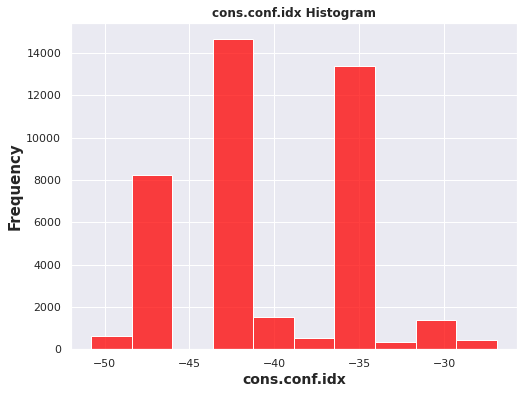

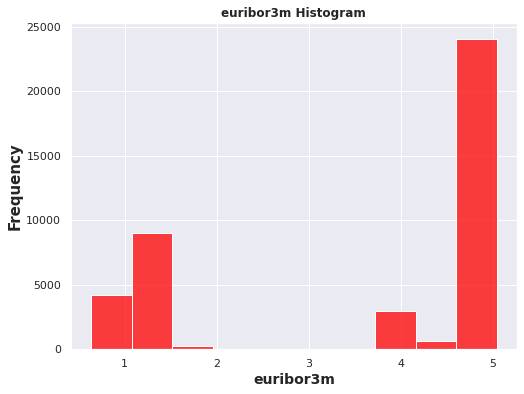

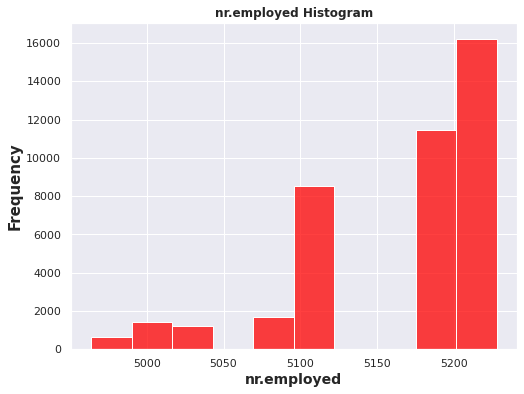

In [113]:
#Histogram for Continuous Variables
for col in conti_columns:
    plt.subplots(figsize=(8,6))
    sns.histplot(df[col], bins = 10, color='red')
    plt.xlabel(f'{col}', size = 14, fontweight='bold')
    plt.ylabel('Frequency', size=15, fontweight='bold')
    plt.title(f'{col} Histogram', fontweight = 'bold')
    plt.show()

In [114]:
for col in conti_columns:
    #Q1, Q2, Q3= df[col].quantile([.25, .5, .75])
    print("Variable: %s" %col)
    print(" 1. Mean= %f" %df[col].mean())
    print(" 2. Variance= %f" %df[col].var())
    print(" 3. Min= %f" %df[col].min())
    print(" 4. Max= %f" %df[col].max())
    print(" 5. Median= %f" %df[col].median())
    print(" 6. Q1 (25th Percentile)= %f" %df[col].quantile(0.25))
    print(" 7. Q3 (75th percentile)= %f" %df[col].quantile(0.75))
    print(" 8. Inter Quartile Range= %f" %(df[col].quantile(0.75)-df[col].quantile(0.25))+"\n")

Variable: age
 1. Mean= 40.024060
 2. Variance= 108.602451
 3. Min= 17.000000
 4. Max= 98.000000
 5. Median= 38.000000
 6. Q1 (25th Percentile)= 32.000000
 7. Q3 (75th percentile)= 47.000000
 8. Inter Quartile Range= 15.000000

Variable: duration
 1. Mean= 258.285010
 2. Variance= 67225.728877
 3. Min= 0.000000
 4. Max= 4918.000000
 5. Median= 180.000000
 6. Q1 (25th Percentile)= 102.000000
 7. Q3 (75th percentile)= 319.000000
 8. Inter Quartile Range= 217.000000

Variable: campaign
 1. Mean= 2.567593
 2. Variance= 7.672975
 3. Min= 1.000000
 4. Max= 56.000000
 5. Median= 2.000000
 6. Q1 (25th Percentile)= 1.000000
 7. Q3 (75th percentile)= 3.000000
 8. Inter Quartile Range= 2.000000

Variable: pdays
 1. Mean= 962.475454
 2. Variance= 34935.687284
 3. Min= 0.000000
 4. Max= 999.000000
 5. Median= 999.000000
 6. Q1 (25th Percentile)= 999.000000
 7. Q3 (75th percentile)= 999.000000
 8. Inter Quartile Range= 0.000000

Variable: previous
 1. Mean= 0.172963
 2. Variance= 0.244927
 3. Min= 0

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


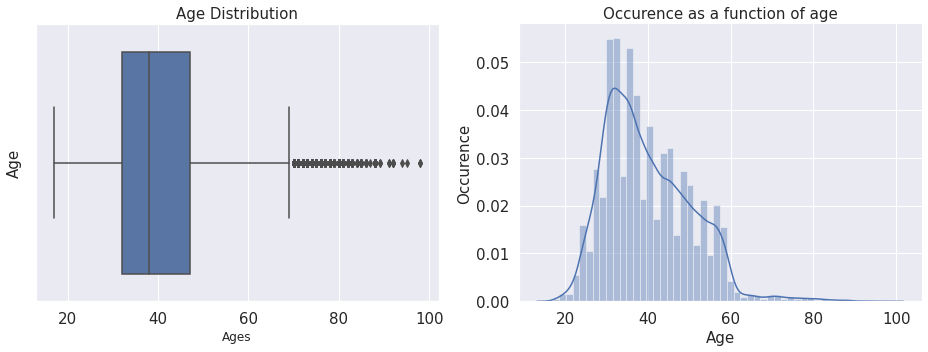

In [115]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Ages')
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Occurence as a function of age', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() ;

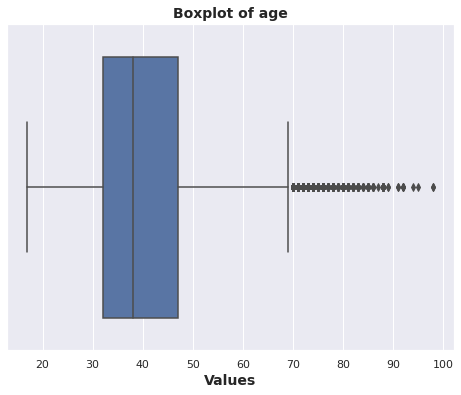

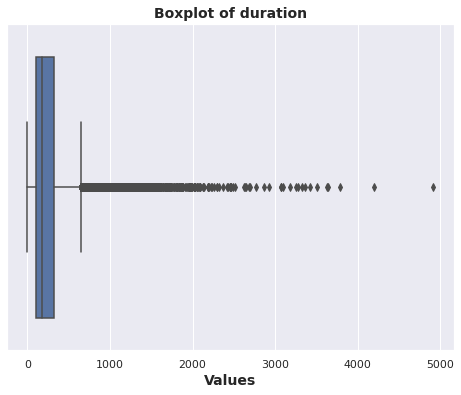

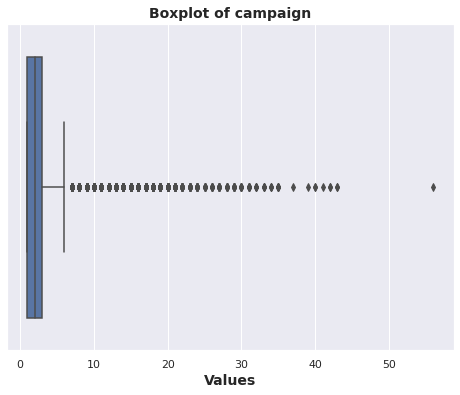

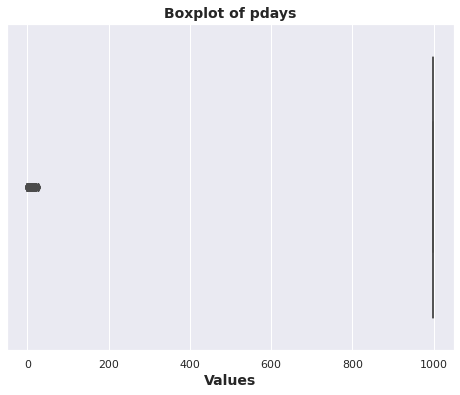

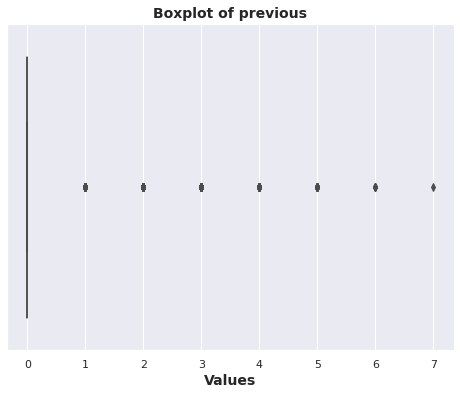

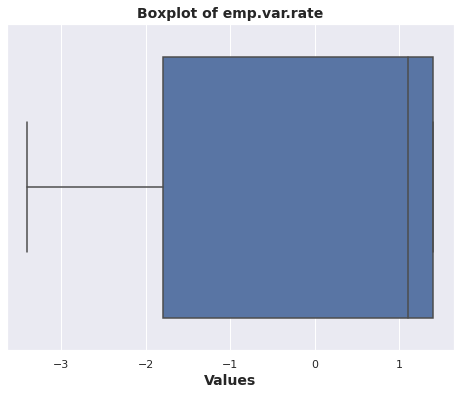

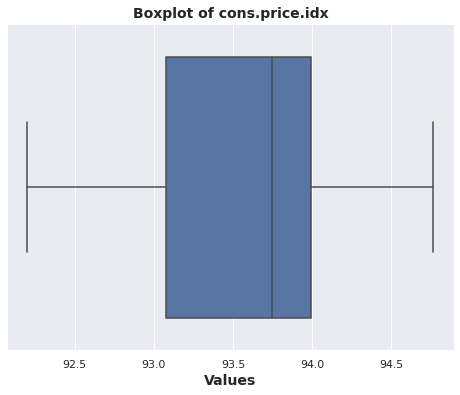

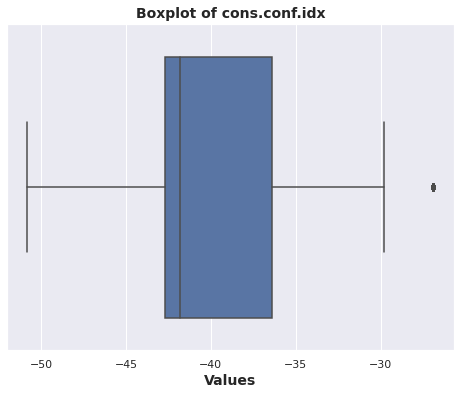

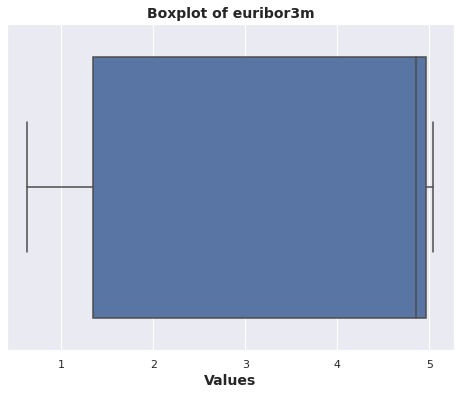

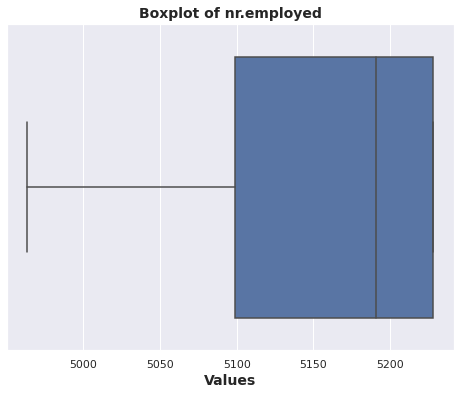

In [116]:
#Boxplot for continuous variables
for col in conti_columns:
    plt.subplots(figsize=(8,6))
    sns.boxplot(x = df[col])
    plt.xlabel('Values',fontweight = 'bold', size= 14)
    plt.title(f'Boxplot of {col}', fontweight = 'bold', size =14)
    plt.show()

##EDA

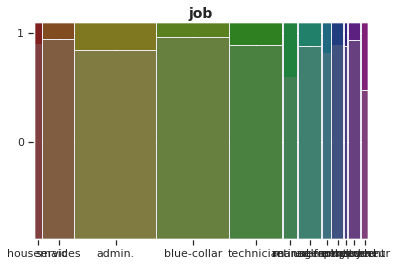

In [117]:
mosaic(df, ['job', 'y'], labelizer=lambda k: '')
plt.xticks(rotation=90, size=14)
plt.xlabel('job', fontweight='bold', size=14)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"]=(12, 5);

Admin, blue-collars and technicians make up the majority in the dataset. Blue-collars are least likely among all job demographics to subscribe to a term-deposit.

Students (31.4%), retired people (25.2%) and unemployed (14%) categories are most likely to subscribe to term deposits. However, these demographics are some of the least sampled.

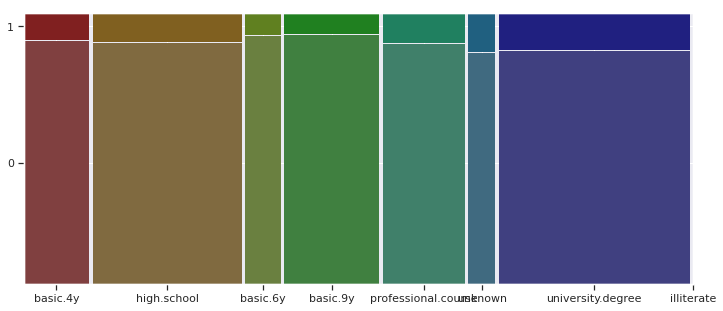

In [118]:
mosaic(df, ['education', 'y'], labelizer=lambda k: '')
plt.xticks(rotation=90, size=14)
plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(12, 5);

University degree holders are the most likely to subscribe, however the difference 
among different education levels is not very stark.

The illiterate category has only 18 records and hence, not meaningful. The unknown category has the highest % of subscription and so we can club it with univ. degree holder category (since it has a similar %) to not lose valuable information.

Of the 6 categories, basic.4y, basic.6y and basic.9y are least likely to subscribe.

The top 3 categories are professional.course, university.degree and high.school which show that there is a positive correlation between the time spent in education and odds of subscribing.

The default category (response to the question "Do you have credit in default") has only 3 responses as 'yes'. 27% of the respondents did not answer and hence, this variable is not meaningful.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


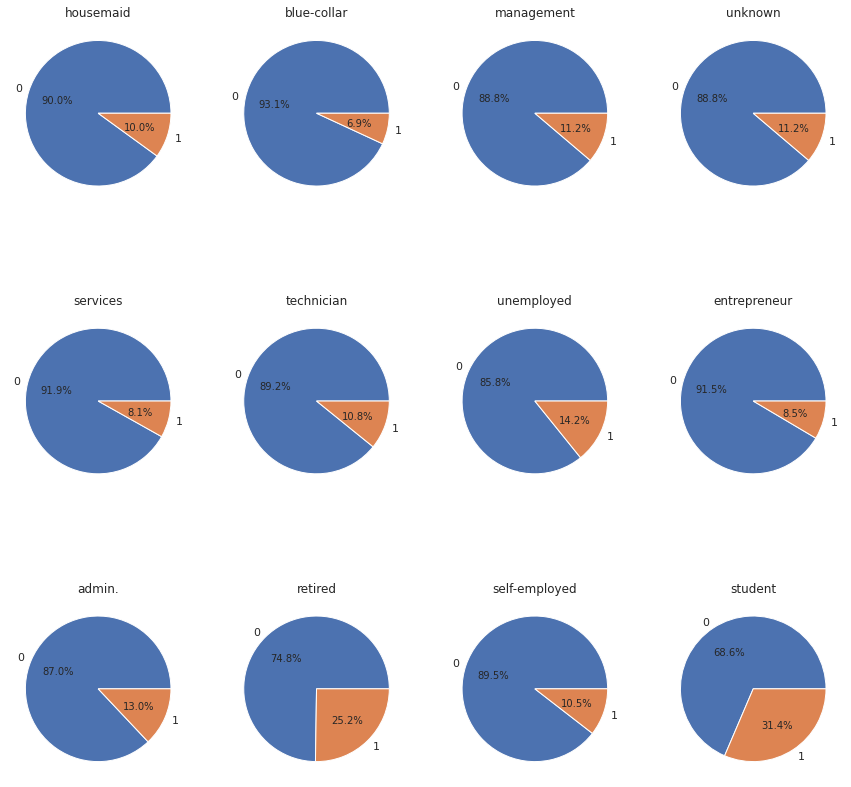

In [119]:
fig, ax = plt.subplots(3,4,figsize=(15,15))
i=0
for day in df["job"].unique():
  df1=df.loc[df["job"]==day]
  df1=df1[["job","y"]].groupby(['y']).agg('count')
  ax[i%3,int(i/3)].pie(df1,labels=df1.index,autopct='%1.1f%%')
  ax[i%3,int(i/3)].set_title(day)
  i=i+1
plt.show()

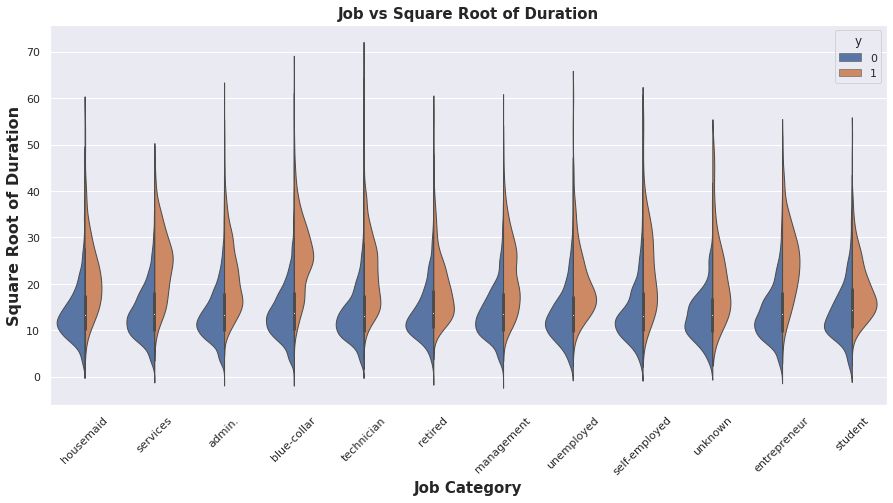

In [120]:
plt.figure(figsize=(15, 7))
sns.violinplot(data=df, y=np.sqrt(df["duration"]), x="job",hue="y",split=True, linewidth=1)
plt.title("Job vs Square Root of Duration", fontweight='bold', size=15)
plt.ylabel('Square Root of Duration',fontweight='bold',size=16)
plt.xlabel("Job Category", fontweight='bold', size=15)
plt.xticks(rotation=45)
plt.show()

As expected, across all job categories, the longer the call goes on, the odds of a new subscription increases. This variable can not be determined or worked upon beforehand and therefore would not be used in our models or any subsequent analysis.

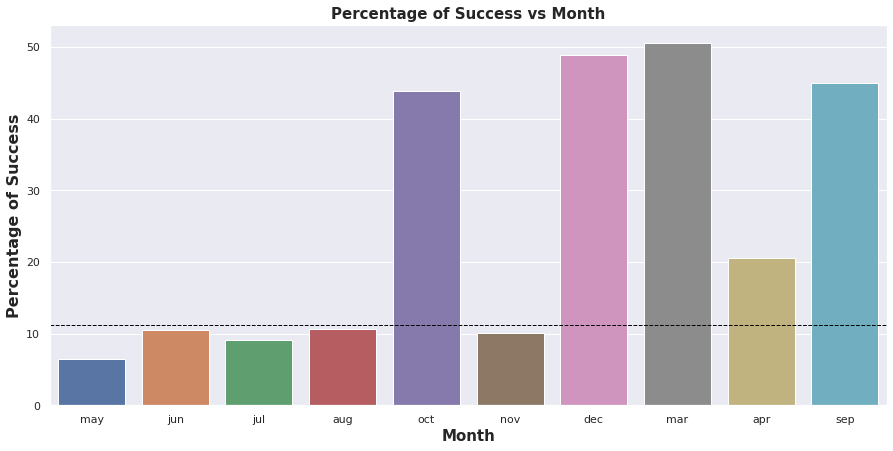

In [121]:
dfx = pd.DataFrame(columns=["month","percentage of success"])
for month in df["month"].unique():
  df1=df.loc[df['month']==month]
  df1=df1.groupby('y').count()[['age']]
  dfx = dfx.append({'month' : month, 'percentage of success' : 100*float(df1.loc[1])/(float(df1.loc[1]+df1.loc[0]))},ignore_index = True) 

dfm=df.groupby("y").count()[['age']]

#Plotting Barplot of Success % for each month
plt.figure(figsize=(15, 7))
plt.axhline(100*float(dfm.loc[1])/(float(dfm.loc[1]+dfm.loc[0])), color='black'\
            ,linestyle='--',linewidth=1)
sns.barplot(x='month', y='percentage of success', data=dfx)
plt.ylabel('Percentage of Success',fontweight='bold',size=16)
plt.xlabel('Month',fontweight='bold',size=15)
plt.title('Percentage of Success vs Month', fontweight='bold',size=15)
plt.show()

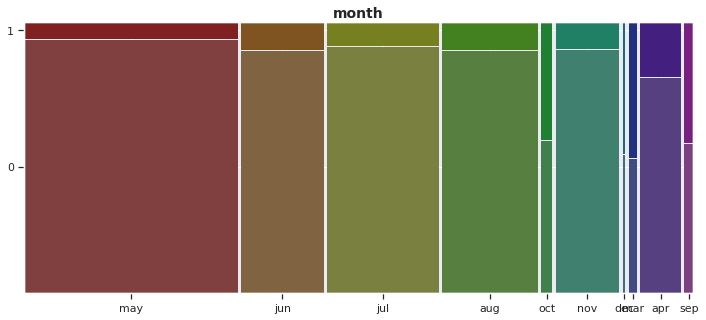

In [122]:
mosaic(df, ['month', 'y'], labelizer=lambda k: '')
plt.xticks(rotation=90, size=14)
plt.xlabel('month', fontweight='bold', size=14)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"]=(12, 5);

From the above two plots, it is abundantly clear that in all those months (4: october, march, december, september) where fewer people were contacted, the subscription rate was above 40%.

Interestingly, May was the month in which maximum number of people were contacted, the percentage of favourable responses was the lowest.

There is a definite correlation of % of favourable response with the number of calls made in a month, but the cause is unknown.

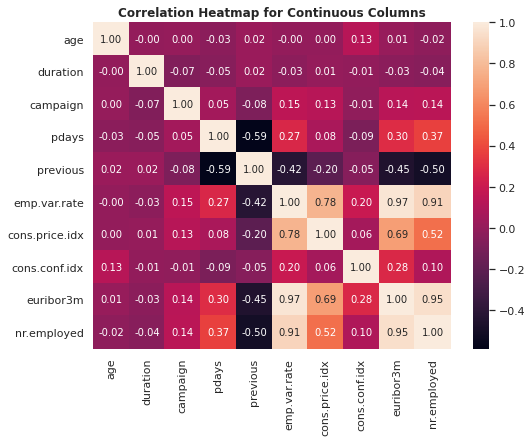

In [123]:
#Correlation Heatmap
plt.subplots(figsize=(8,6))
sns.heatmap(df[conti_columns].corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap for Continuous Columns', fontweight='bold')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


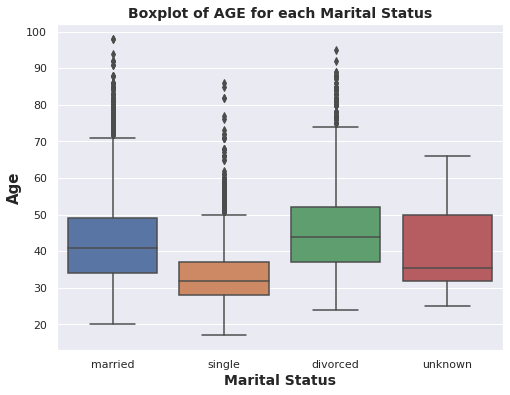

In [124]:
#Hued BoxPlot
plt.subplots(figsize=(8,6))
sns.boxplot(df['marital'], df['age'])
plt.xlabel('Marital Status', fontweight='bold', size=14)
plt.ylabel('Age', fontweight='bold', size=15)
plt.title('Boxplot of AGE for each Marital Status', fontweight='bold', size=14)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


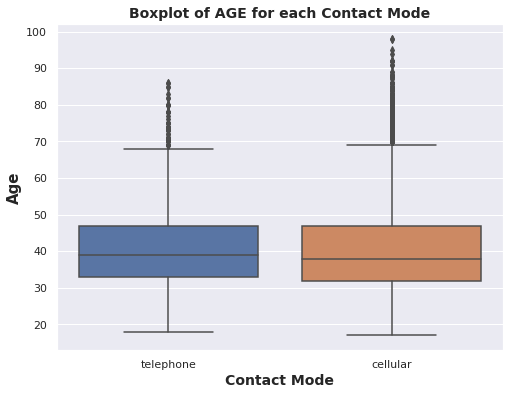

In [125]:
plt.subplots(figsize=(8,6))
sns.boxplot(df['contact'], df['age'])
plt.xlabel('Contact Mode', fontweight='bold', size=14)
plt.ylabel('Age', fontweight='bold', size=15)
plt.title('Boxplot of AGE for each Contact Mode', fontweight='bold', size=14)
plt.show()

#**Descriptive Data Analysis**

##**a) Bank Client Data Analysis**

In [126]:
#Bi-Histogram for Number of people who did a term deposit
#W.r.t Marital status
#Preparation Begins

#Dataframe of people who did not subcribe
df_no = df[df['y']==0]
#Dataframe of people who did subscribe
df_yes = df[df['y']==1]
df_new = df.copy()

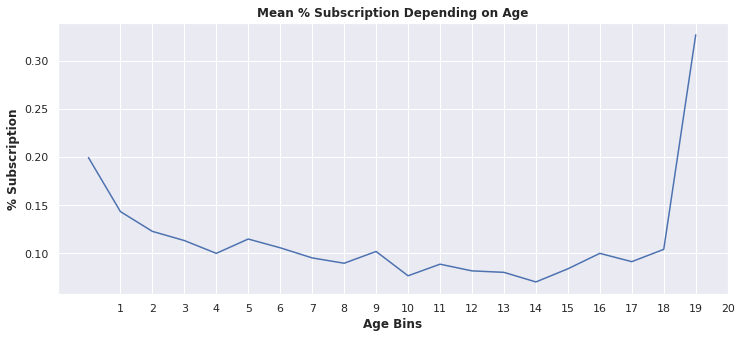

Above 56
Below 32


In [127]:
#MEAN SUBSCRIPTION RATE FOR EACH AGE
#introduce new column 'age_buckets' to  discretize the continuous variable 'age'
df_new['age_bins'] = pd.qcut(df_new['age'], 20, labels=False, duplicates = 'drop')

#group by 'age_buckets' and find average campaign outcome per age bucket
mean_age = df_new.groupby(['age_bins'])['y'].mean()

#Plotting Begins
plt.plot(mean_age.index, mean_age.values)
plt.xticks(np.arange(1,21))
plt.title('Mean % Subscription Depending on Age', fontweight='bold')
plt.xlabel('Age Bins', fontweight='bold')
plt.ylabel('% Subscription', fontweight='bold')
plt.show()

print('Above %d'%df_new[df_new['age_bins']==18]['age'].min())
print('Below %d'%df_new[df_new['age_bins']==4]['age'].max())

Therefore the bank should only target those people whose are below 32 years of age or are above 56 years of age with more success being reported when pursuing clients above 56 years of age.

This agrees with our previous analysis that students and retirees are the most likely to subscribe.

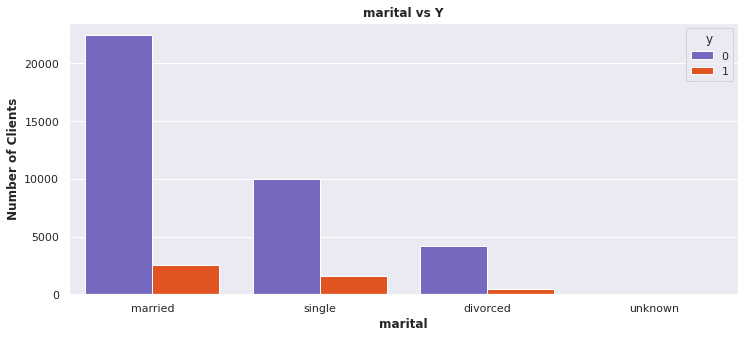

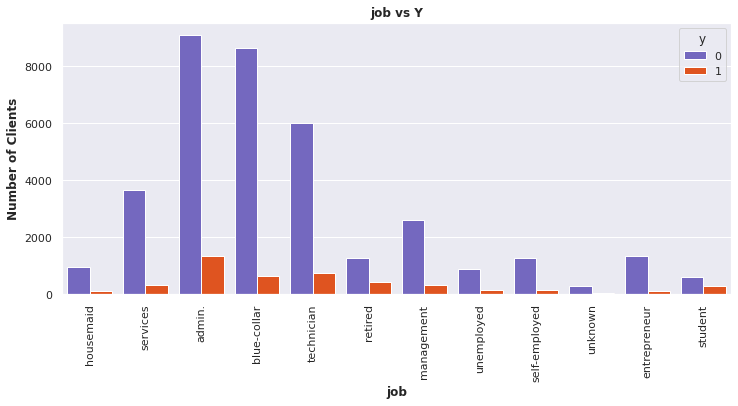

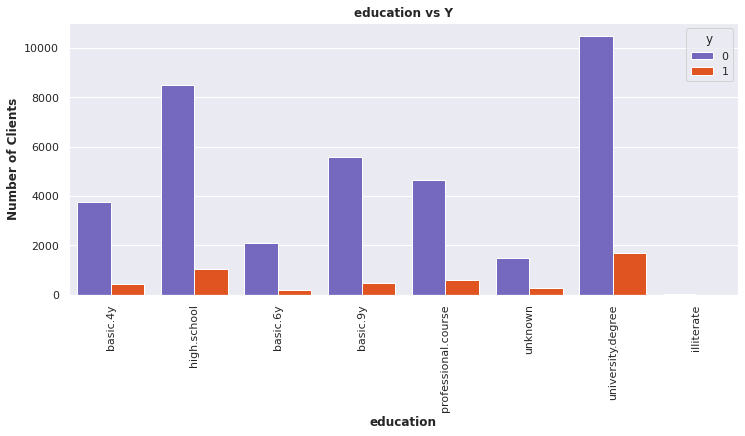

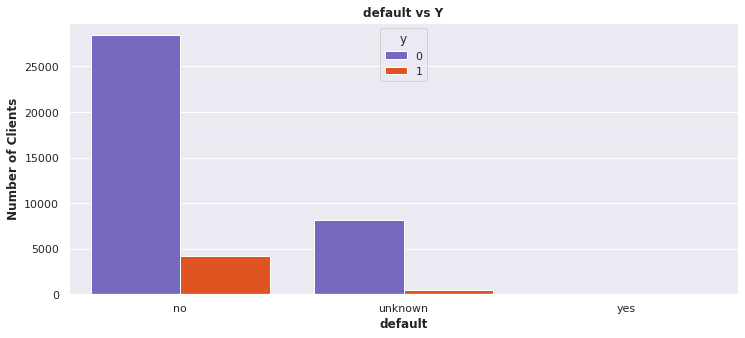

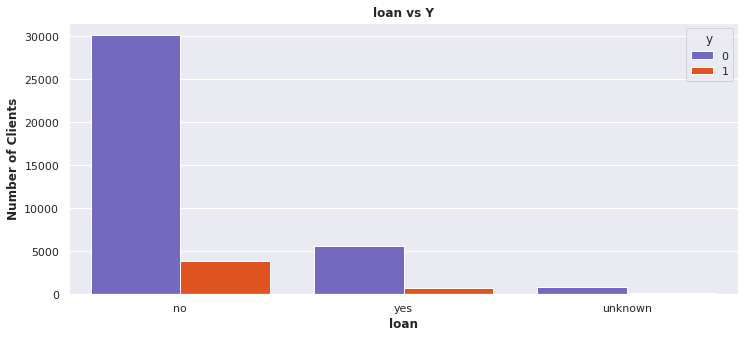

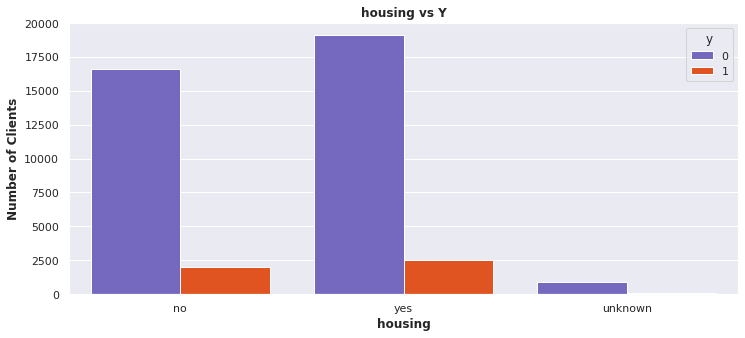

In [128]:
bank_catcols = ['marital','job','education','default','loan','housing']
for col in bank_catcols:
    sns.countplot(x = col, hue='y', data=df, palette='blend:slateblue,orangered')
    plt.xlabel(f'{col}',fontweight='bold')
    plt.ylabel('Number of Clients',fontweight='bold')
    plt.title(f'{col} vs Y', fontweight='bold')
    if col=='education' or col=='job':
        plt.xticks(rotation = 90)
    plt.show()

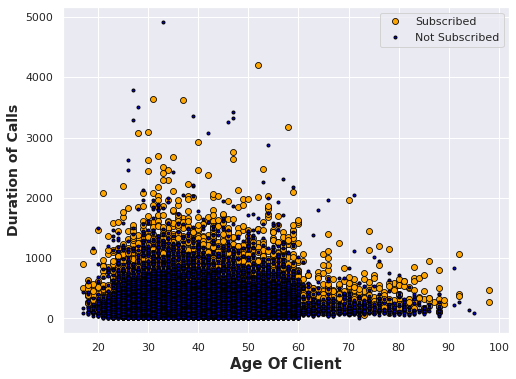

In [129]:
pos = df['y']==1
neg = df['y']==0

#Plotting Begins
plt.subplots(figsize=(8,6))

#Plotting Subcribed Clients and non subcribed clients with diff. markers
plt.plot(df['age'].to_numpy()[pos], df['duration'].to_numpy()[pos],'o',\
         color = 'orange', mec='black',mew=0.8)
plt.plot(df['age'].to_numpy()[neg], df['duration'].to_numpy()[neg],'.',\
         color = 'mediumblue', mec='black')
plt.ylabel('Duration of Calls', fontweight='bold',size=14)
plt.xlabel('Age Of Client',fontweight='bold',size=15)
plt.legend(['Subscribed','Not Subscribed'])
plt.show()

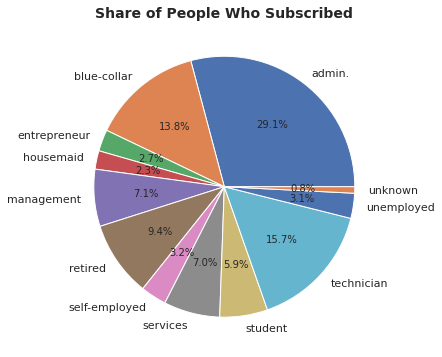

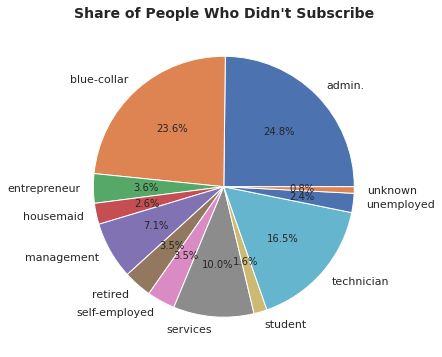

In [130]:
#Pie Chart of SUBSCRIBED by Job

#Jobwise split of number of people who subscribed/didnt
df1 = df_yes.groupby(['job'])['y'].count()
df2 = df_no.groupby(['job'])['y'].count()

plt.subplots(figsize=(8,6))
plt.pie(df1, labels = df1.index, autopct = '%.1f%%')
plt.title('Share of People Who Subscribed', fontweight='bold', size=14)
plt.show()

plt.subplots(figsize=(8,6))
plt.pie(df2, labels = df2.index, autopct = '%.1f%%')
plt.title('Share of People Who Didn\'t Subscribe', fontweight='bold', size=14)
plt.show()

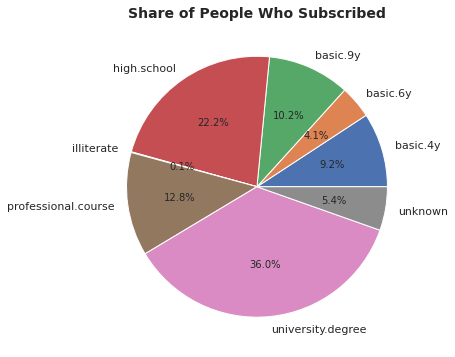

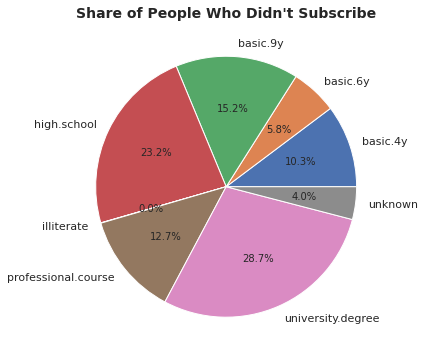

In [131]:
#Pie Chart of SUBSCRIBED by EDUCATION

#Jobwise split of number of people who subscribed/didnt
df1 = df_yes.groupby(['education'])['y'].count()
df2 = df_no.groupby(['education'])['y'].count()

plt.subplots(figsize=(8,6))
plt.pie(df1, labels = df1.index, autopct = '%.1f%%')
plt.title('Share of People Who Subscribed', fontweight='bold', size=14)
plt.show()

plt.subplots(figsize=(8,6))
plt.pie(df2, labels = df2.index, autopct = '%.1f%%')
plt.title('Share of People Who Didn\'t Subscribe', fontweight='bold', size=14)
plt.show()

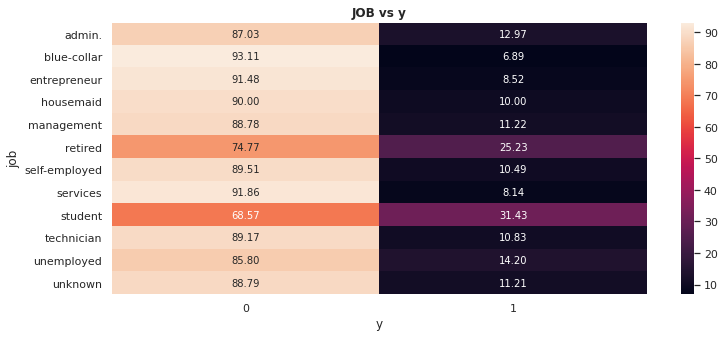

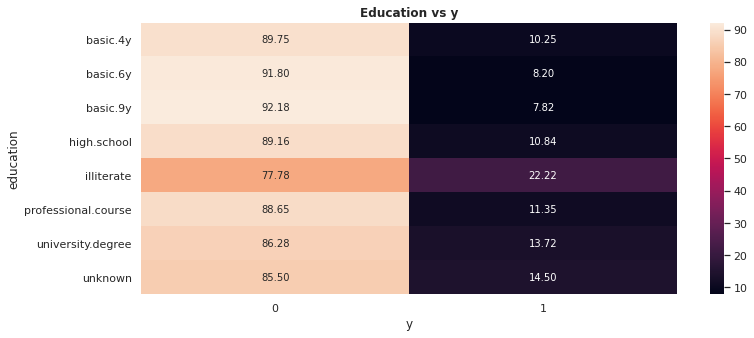

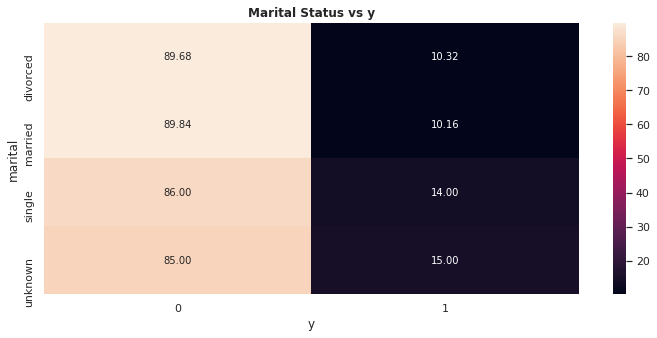

In [132]:
#Percentage Crosstab HeatMaps for Categorical Variables vs Y

#JOB VS Y
sns.heatmap(pd.crosstab(df['job'],df['y']).apply(lambda r:r/r.sum()*100, axis=1), annot=True, fmt='.2f')
plt.title('JOB vs y',fontweight='bold' )
plt.show()

#EDUCATION VS Y 
sns.heatmap(pd.crosstab(df['education'],df['y']).apply(lambda r:r/r.sum()*100, axis=1), annot=True, fmt='.2f')
plt.title('Education vs y',fontweight='bold' )
plt.show()

#MARITAL vs y
sns.heatmap(pd.crosstab(df['marital'],df['y']).apply(lambda r:r/r.sum()*100, axis=1), annot=True, fmt='.2f')
plt.title('Marital Status vs y',fontweight='bold' )
plt.show()

Clients who are single are slightly more likely to subscribe to a term deposit but the probability difference as compared to married / divorced clients is only marginal (3% difference)


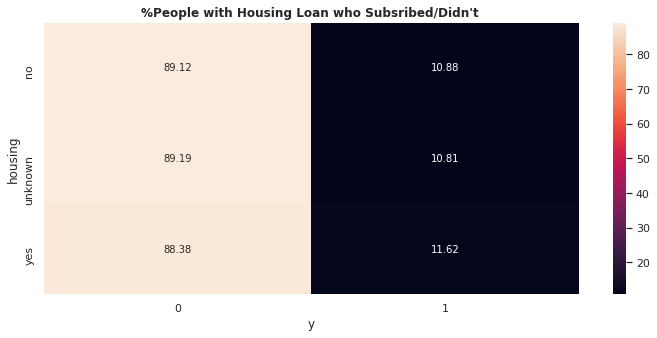

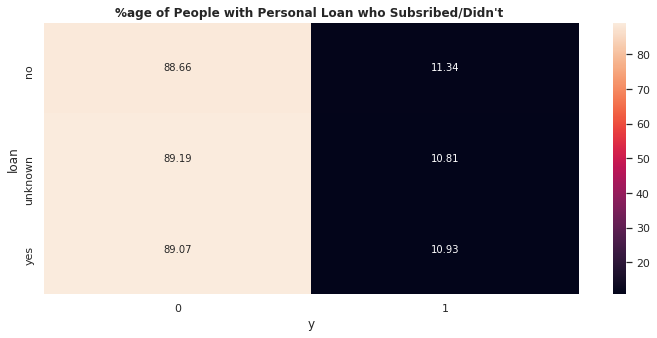

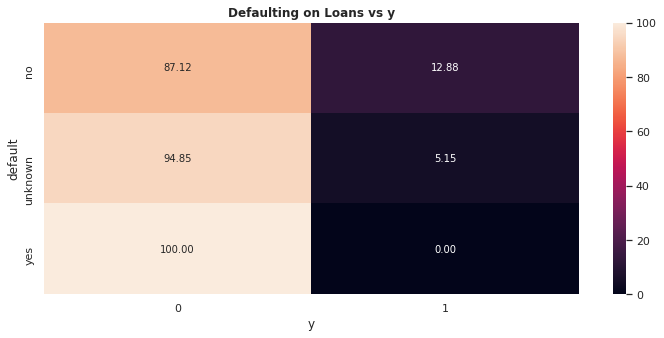

In [133]:
#HOUSING LOAN vs y
sns.heatmap(pd.crosstab(df['housing'],df['y']).apply(lambda r:r/r.sum()*100, axis=1), annot=True, fmt='.2f')
plt.title('%People with Housing Loan who Subsribed/Didn\'t ',fontweight='bold' )
plt.show()

#PERSONAL LOAN vs y
sns.heatmap(pd.crosstab(df['loan'],df['y']).apply(lambda r:r/r.sum()*100, axis=1), annot=True, fmt='.2f')
plt.title('%age of People with Personal Loan who Subsribed/Didn\'t ',fontweight='bold' )
plt.show()

#DEFAULT VS Y
sns.heatmap(pd.crosstab(df['default'],df['y']).apply(lambda r:r/r.sum()*100, axis=1), annot=True, fmt='.2f')
plt.title('Defaulting on Loans vs y',fontweight='bold' )
plt.show()

Takeaways:
1) There isn't much difference in likelihood of clients with/ without house loans / personal loans subscribing to a term deposit

2) Clients who don't have credit in default have significantly higher likelihood in subscribing to a term deposit account as compared to those who have defaulted on credit / whose default status is unknown.

##**b) Attributes related to previous campaign**

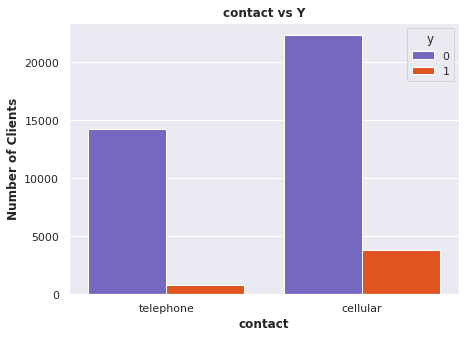

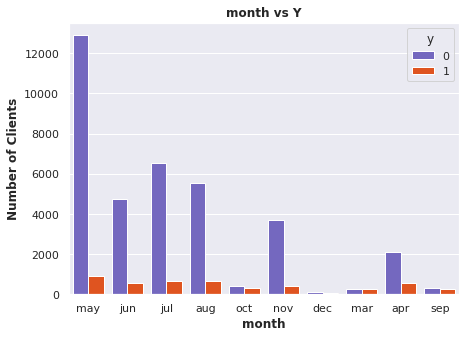

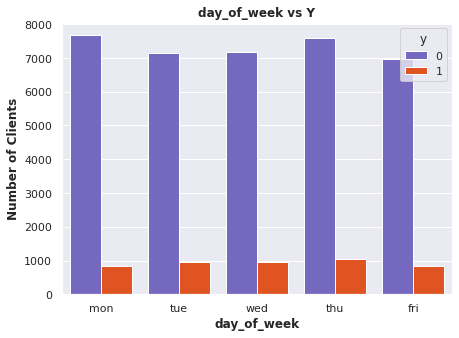

In [134]:
prevcam_cols =['contact','month','day_of_week']
for col in prevcam_cols:
    plt.subplots(figsize=(7,5))
    sns.countplot(x=col,hue='y',data=df, palette='blend:slateblue,orangered')
    plt.xlabel(col,fontweight='bold')
    plt.ylabel('Number of Clients', fontweight='bold')
    plt.title(f'{col} vs Y',fontweight='bold')
    plt.show()

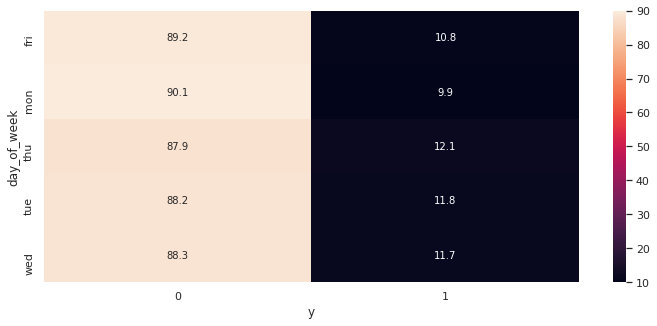

In [135]:
sns.heatmap(pd.crosstab(df['day_of_week'],df['y']).apply(lambda r:r/r.sum()*100 , axis =1), annot= True, fmt='1.1f')
#Please Hypothesis Testing karlo iska
plt.show()

No correlation was expected and the analysis confirms it.

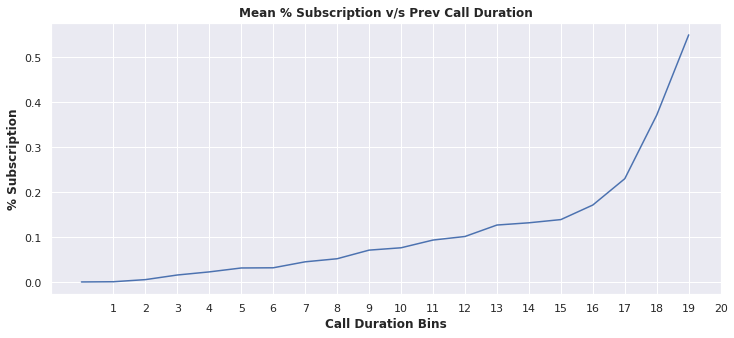

Above 320


In [136]:
#Last contact duration
#introduce new column 'dura_buckets' to  discretize the continuous variable 'duration'
df_new['dura_bins'] = pd.qcut(df_new['duration'], 20, labels=False, duplicates = 'drop')

#group by 'dura_buckets' and find average campaign outcome per age bucket
mean_duration = df_new.groupby(['dura_bins'])['y'].mean()

#Plotting Begins
plt.plot(mean_duration.index, mean_duration.values)
plt.title('Mean % Subscription v/s Prev Call Duration', fontweight='bold')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Call Duration Bins', fontweight='bold')
plt.ylabel('% Subscription', fontweight='bold')
plt.show()

print('Above %d'%df_new[df_new['dura_bins']==15]['duration'].min())

So as seen from the graph, the longer the length of the previous call the higher is the chance for the clients to subscribe to a term deposit and if the length of the call is higher than 320 seconds, the probability of the client subscribing increases very quickly! 

##**c)Social and Economic Context Attributes**

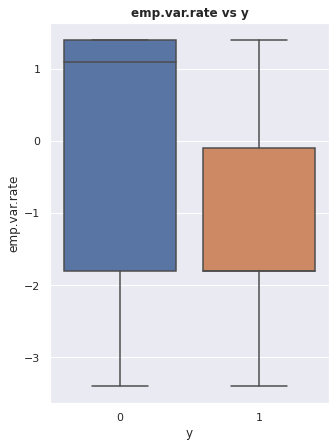

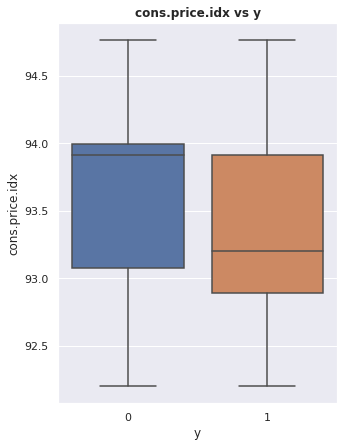

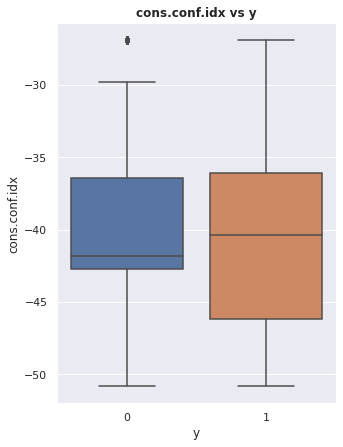

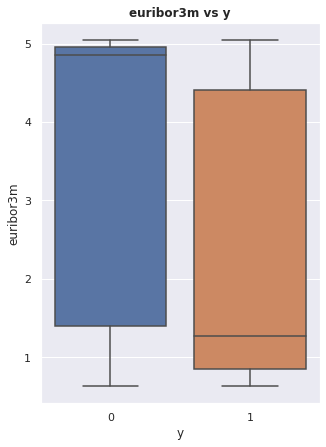

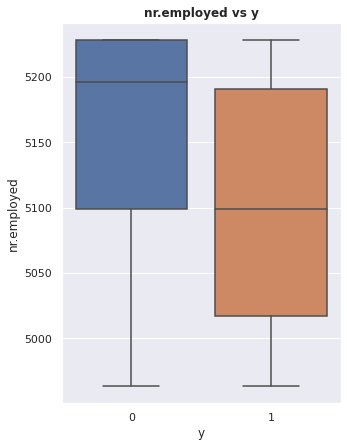

In [137]:
socialcol = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
for col in socialcol:
  plt.figure(figsize=(5, 7))
  sns.boxplot(y = col, x = "y", data = df)
  plt.title(f'{col} vs y',fontweight='bold')
  plt.show()

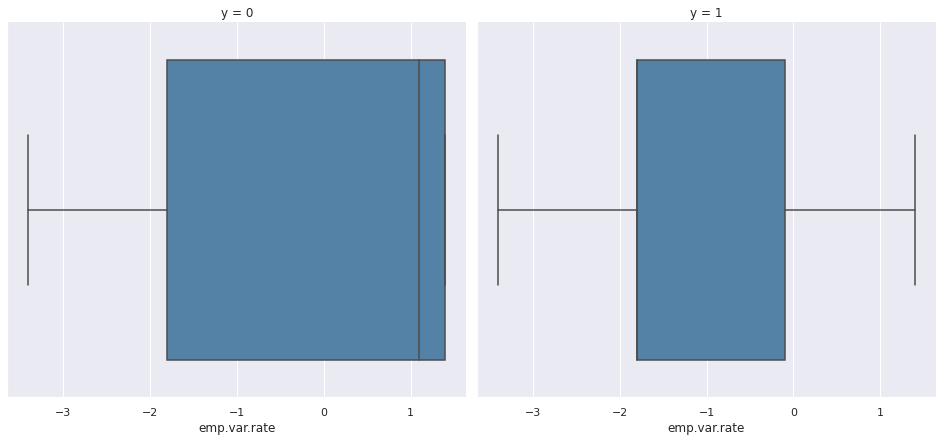

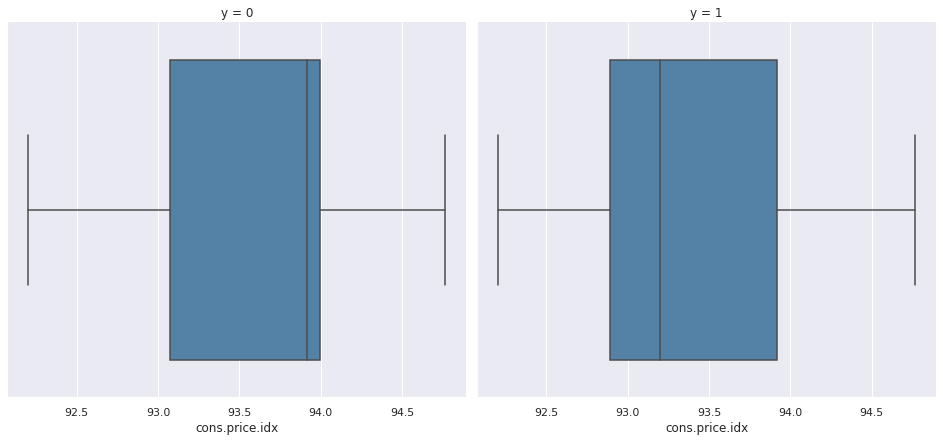

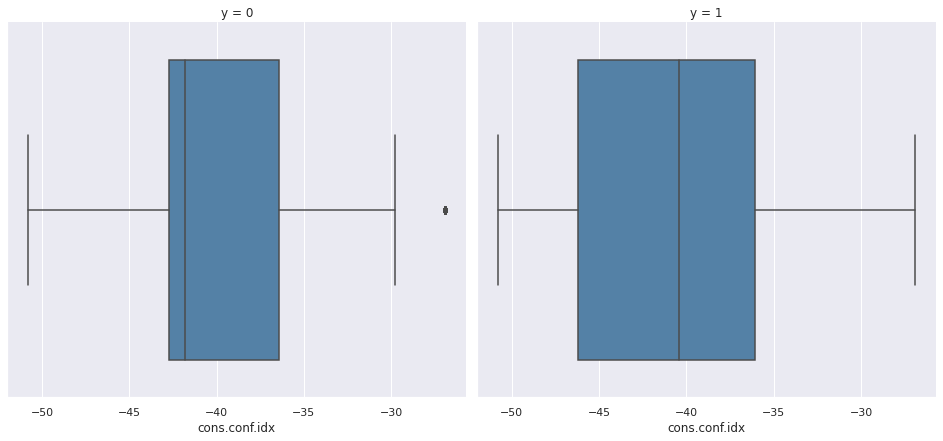

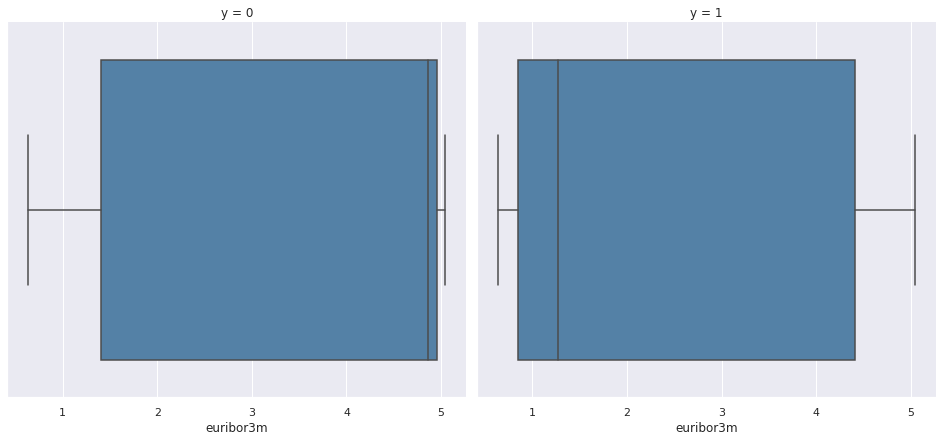

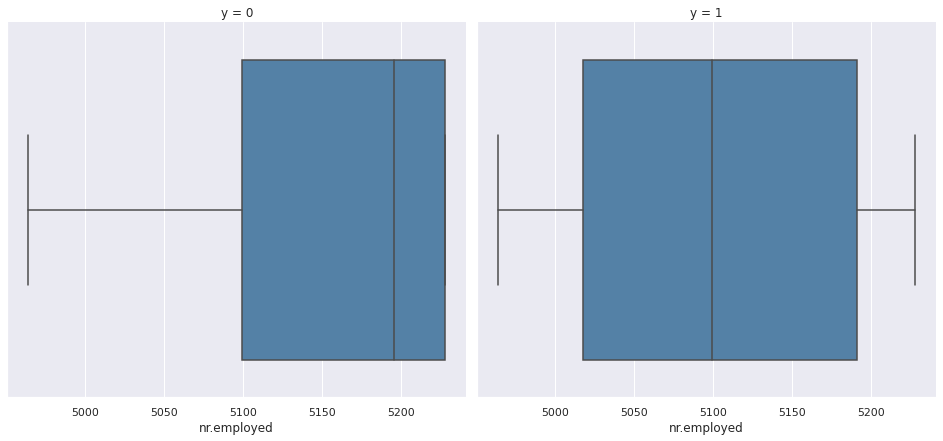

In [138]:
socio_cols=['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
binsize=[4,2,3]
for col in socio_cols:
    sns.catplot(data=df, x=col, col='y', height=6, aspect = 1.1, kind='box',\
                color='steelblue')
    #plt.xlabel(col,fontweight='bold',size=14)
    #plt.ylabel('Count',fontweight='bold',size=15)
    #plt.title(f'{col} vs Y Hued Histogram', fontweight='bold', size=14)
    plt.show()

##**d) Other Attributes**

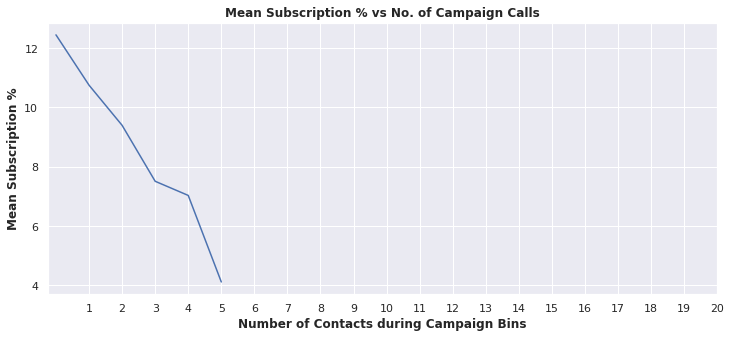

In [139]:
#Number of contacts made during the entire campaign
df_new['campaign_bins'] = pd.qcut(df_new['campaign'],20, labels=False, duplicates='drop')
mean_success = df_new.groupby('campaign_bins')['y'].mean()

plt.plot(mean_success.index, mean_success.values*100)
plt.title('Mean Subscription % vs No. of Campaign Calls', fontweight='bold')
plt.xlabel('Number of Contacts during Campaign Bins', fontweight='bold')
plt.ylabel('Mean Subscription %', fontweight='bold')
plt.xticks(np.arange(1,21,1))
plt.show()

In [140]:
df_new[df_new['campaign_bins']==1]['campaign'].min()

3

Therefore the more calls we make to a particular client as part of the campaign, the lesser is the probability of the client subscribing to a term deposit in the bank. And in my opinion no more than 3 calls should be made to any client during the campaign because if we increase the calls, the success rate falls below 10%


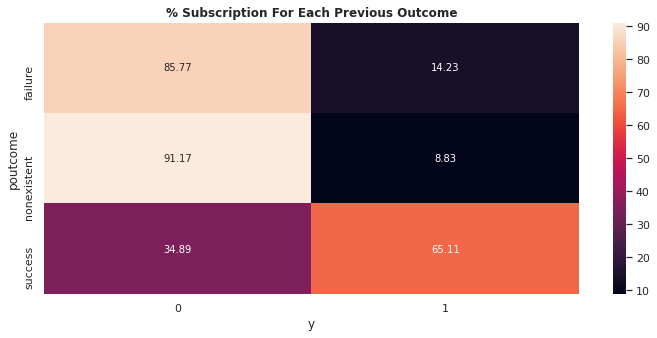

In [141]:
sns.heatmap(pd.crosstab(df['poutcome'],df['y']).apply(lambda r:r/r.sum()*100,\
                                                axis=1), annot=True, fmt='.2f')
plt.title('% Subscription For Each Previous Outcome', fontweight='bold')
plt.show()

It is seen that in general those people who subscribed to term deposit accounts in an earlier campaign are more likely to resubscribe to a term deposit account again! Also People who had not been approached in previous campaigns had the lowest subscription rate out of all the 3 categories

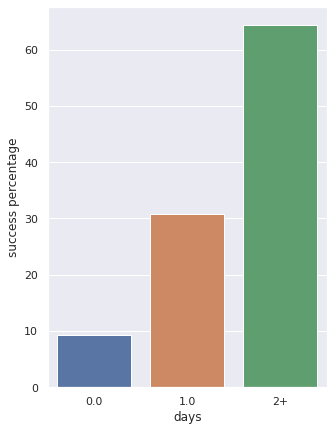

In [142]:
dfx = pd.DataFrame(columns=["days",'duration',"success percentage"])
dfa=df.copy()
dfa.loc[dfa['pdays']==999, 'pdays'] = 0
for i in range(0,2):
  df1=dfa.loc[dfa["pdays"]==i]
  mean_val=df1.duration.mean()
  df1=df1.groupby('y').count()[['age']]
  dfx=dfx.append({'duration':mean_val,'days':i,'success percentage' : 100*float(df1.loc[1])/(float(df1.loc[1]+df1.loc[0]))},ignore_index = True)
df1=dfa.loc[dfa["pdays"]!=0]
df1=df1.loc[df1["pdays"]!=1]
mean_val=df1.duration.mean()
df1=df1.groupby('y').count()[['age']]
dfx = dfx.append({'duration':mean_val,'days':'2+','success percentage' : 100*float(df1.loc[1])/(float(df1.loc[1]+df1.loc[0]))},ignore_index = True)
plt.figure(figsize=(5, 7))
sns.barplot(x='days', y='success percentage', data=dfx)
plt.show()

there is a clear correlation between pdays and favourable outcomes (%).
This percentage goes above 50% for all those calls which were made 2 or more days after the most recent call.

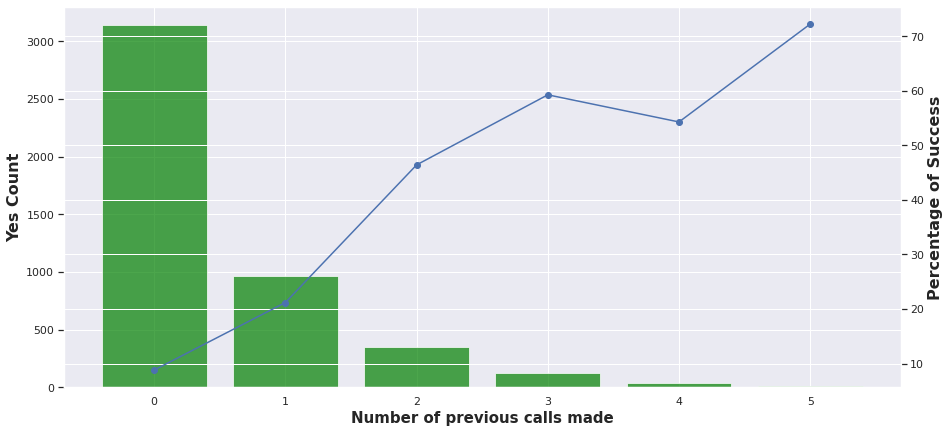

In [143]:
dfx = pd.DataFrame(columns=['total_count','yes_count',"no_call","percentage"])
for camp in range(0,6):
  df1=df.loc[df["previous"]==camp]
  df1=df1.groupby('y').count()[['age']]
  dfx = dfx.append({'no_call':camp,'total_count':float(df1.loc[1]+df1.loc[0]),'yes_count':float(df1.loc[1]),'percentage' : 100*float(df1.loc[1])/(float(df1.loc[1]+df1.loc[0]))},ignore_index = True)
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(dfx['no_call'],dfx["yes_count"],color="green",alpha=0.7)
ax.set_ylabel("Yes Count", fontweight='bold', size=16)
ax2=ax.twinx()
ax2.plot(dfx['no_call'],dfx['percentage'],marker='o')
ax2.set_ylabel("Percentage of Success", fontweight='bold', size=16)
ax.set_xlabel('Number of previous calls made', fontweight='bold', size=15)
plt.show()

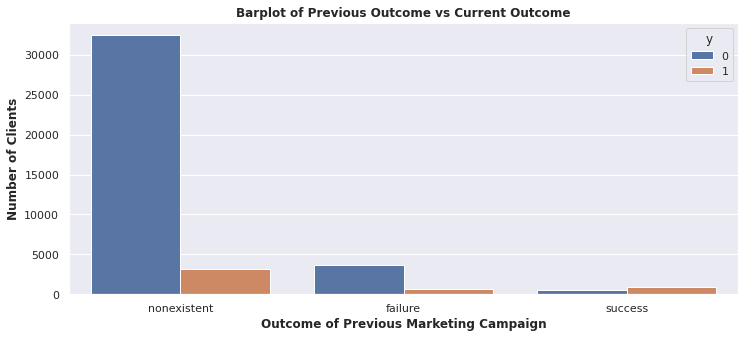

In [144]:
#Outcome of previous marketing campaigns
sns.countplot(x='poutcome', data=df, hue='y')
plt.xlabel('Outcome of Previous Marketing Campaign', fontweight='bold')
plt.ylabel('Number of Clients', fontweight='bold')
plt.title('Barplot of Previous Outcome vs Current Outcome', fontweight='bold')
plt.show()

Multiple calls in a single campaign increases the probability of success significantly.

Takeaway: Follow up calls are more likely to get new subscribers, but it's better to wait to call again to increase probability of success.

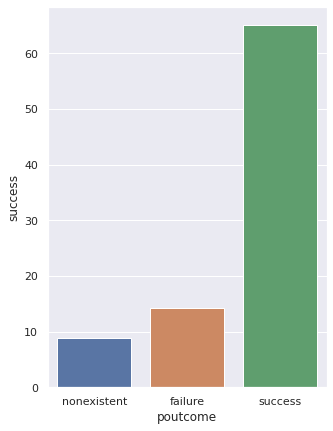

In [145]:
dfx = pd.DataFrame(columns=['poutcome',"success"])
for out in df["poutcome"].unique():
  df1=df.loc[df["poutcome"]==out]
  df1=df1.groupby('y').count()[['age']]
  dfx = dfx.append({'poutcome':out,'success' : 100*float(df1.loc[1])/(float(df1.loc[1]+df1.loc[0]))},ignore_index = True)
plt.figure(figsize=(5, 7))
sns.barplot(x='poutcome', y="success", data=dfx)

success rate is significanly high for clients who have already subscribed, compaired to those who had previously rejected the scheme. 

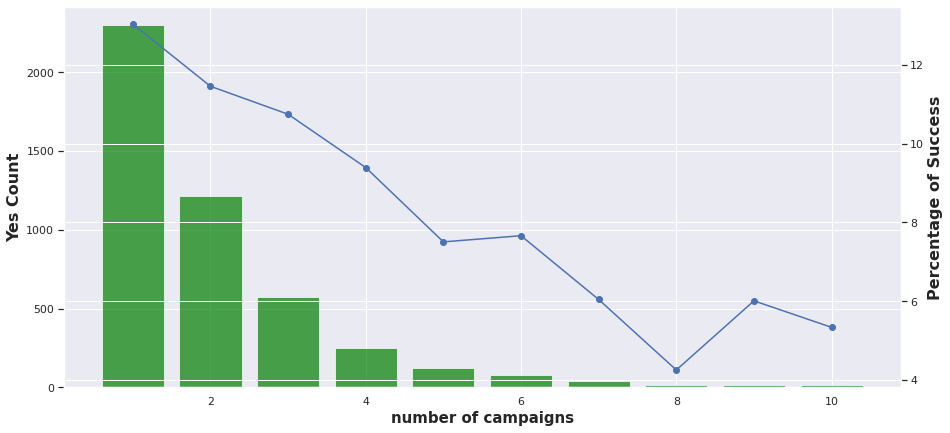

In [146]:
dfx = pd.DataFrame(columns=['total_count','yes_count',"campaign","percentage"])
yes_val=0
no_val=0
for camp in range(1,11):
  df1=df.loc[df["campaign"]==camp]
  df1=df1.groupby('y').count()[['age']]
  dfx = dfx.append({'campaign':camp,'total_count':float(df1.loc[1]+df1.loc[0]),'yes_count':float(df1.loc[1]),'percentage' : 100*float(df1.loc[1])/(float(df1.loc[1]+df1.loc[0]))},ignore_index = True)
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(dfx['campaign'],dfx["yes_count"],color="green",alpha=0.7)
ax.set_ylabel("Yes Count", fontweight='bold', size=16)
ax2=ax.twinx()
ax2.plot(dfx['campaign'],dfx['percentage'],marker='o')
ax2.set_ylabel("Percentage of Success", fontweight='bold', size=16)
ax.set_xlabel('number of campaigns', fontweight='bold', size=15)
plt.show()


probability of success decreases dramatically on targetting the same contact in next campaign

takeaway : in order to get more subscriber its better to target new contact and those who had subscribed in the previous campaign.

,column,cramer's V
0,job,0.023338
1,marital,0.002978
2,education,0.004688
3,default,0.009871
4,housing,0.000138
5,loan,0.000027
6,contact,0.020936
7,month,0.075293
8,day_of_week,0.000635
9,previous,0.055828


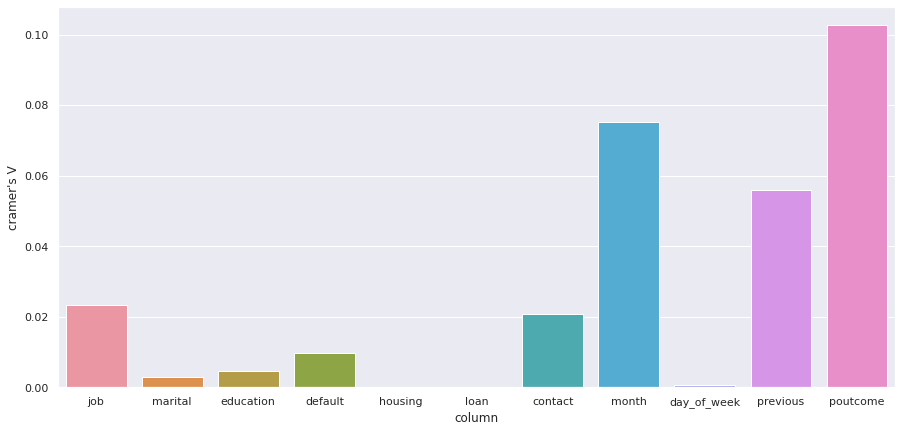

In [147]:
from scipy.stats import chi2_contingency
col=["job","marital","education","default",'housing','loan','contact','month','day_of_week',"previous",'poutcome']
dfx = pd.DataFrame(columns=["column","cramer's V"])
for col in col:
  crosstab =np.array(pd.crosstab(df[col],df['y'], rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape)-1
  cramers=stat/(obs*mini)
  dfx = dfx.append({'column':col,"cramer's V":cramers},ignore_index = True)
display(dfx)
plt.figure(figsize=(15, 7))
sns.barplot(x='column', y="cramer's V", data=dfx)
plt.show()

poutcome variable is the outcome of the previous campaign.

previous variable is the number of calls made in the previous campaign.

Both of these variables are highly important features according to the **Cramer's V** test.

#**Hypothesis Testing**

##**a) $\chi^2$ Contingency test to Determine Independence of Two Categorical Variables**

###With $\alpha$ = 0.05 (Significance Level)



Null Hypothesis $(H_0)$: The possibility of client subscription **does not** depend upon his/ her **job**

Alternate Hypothesis $(H_1)$:The possibility of client subscription **does** depend upon his/ her **job**!

In [148]:
from scipy import stats

t, pval, dof, expected = stats.chi2_contingency(pd.crosstab(df['job'],df['y']))
# interpret p-value 
alpha = 0.05
print("p value is %s"%pval) 
if pval <= alpha: 
    print('Null Hypothesis is rejected. So possibility of subscription depends upon a client\'s job') 
else: 
    print('Failed to Reject Null Hypothesis. So possibility of subscription does not depend upon a client\'s job')

p value is 4.189763287563623e-199
Null Hypothesis is rejected. So possibility of subscription depends upon a client's job


Null Hypothesis $(H_0)$: The possibility of client suubscription **does not** depend upon his/ her **education**

Alternate Hypothesis $(H_1)$:The possibility of client suubscription **does** depend upon his/ her **education**!

In [149]:
t, pval, dof, expected = stats.chi2_contingency(pd.crosstab(df['education'],df['y']))

# interpret p-value 
alpha = 0.05
print("p value is %s"%pval) 
if pval <= alpha: 
    print('Null Hypothesis is rejected. So possibility of subscription depends upon a client\'s education') 
else: 
    print('Failed to Reject Null Hypothesis. So possibility of subscription does not depend upon a client\'s education')

p value is 3.3051890144025054e-38
Null Hypothesis is rejected. So possibility of subscription depends upon a client's education


Null Hypothesis $(H_0)$: The possibility of client suubscription **does not** depend upon his/ her **marital status**

Alternate Hypothesis $(H_1)$:The possibility of client suubscription **does** depend upon his/ her **marital status**!

In [150]:
t, pval, dof, expected = stats.chi2_contingency(pd.crosstab(df['marital'],df['y']))

# interpret p-value 
alpha = 0.05
print("p value is %s"%pval) 
if pval <= alpha: 
    print('Null Hypothesis is rejected. So possibility of subscription depends upon a client\'s marital status') 
else: 
    print('Failed to Reject Null Hypothesis. So possibility of subscription does not depend upon a client\'s marital status')

p value is 2.068014648442211e-26
Null Hypothesis is rejected. So possibility of subscription depends upon a client's marital status


Null Hypothesis $(H_0)$: The possibility of client suubscription **does not** depend upon his/ her **loan status**

Alternate Hypothesis $(H_1)$:The possibility of client suubscription **does** depend upon his/ her **loan status**!

In [151]:
t, pval, dof, expected = stats.chi2_contingency(pd.crosstab(df['loan'],df['y']))

# interpret p-value 
alpha = 0.05
print("p value is %.5f"%pval) 
if pval <= alpha: 
    print('Null Hypothesis is rejected. So possibility of subscription depends upon a client\'s loan status') 
else: 
    print('Failed to Reject Null Hypothesis. So possibility of subscription does not depend upon a client\'s loan status')

p value is 0.57868
Failed to Reject Null Hypothesis. So possibility of subscription does not depend upon a client's loan status


Null Hypothesis $(H_0)$: The possibility of client suubscription **does not** depend upon his/ her **housing loan status**

Alternate Hypothesis $(H_1)$:The possibility of client suubscription **does** depend upon his/ her **housing loan status**!

In [152]:
t, pval, dof, expected = stats.chi2_contingency(pd.crosstab(df['housing'],df['y']))

# interpret p-value 
alpha = 0.05
print("p value is %.5f"%pval) 
if pval <= alpha: 
    print('Null Hypothesis is rejected. So possibility of subscription depends upon a client\'s housing loan status') 
else: 
    print('Failed to Reject Null Hypothesis. So possibility of subscription does not depend upon a client\'s housing loan status')

p value is 0.05829
Failed to Reject Null Hypothesis. So possibility of subscription does not depend upon a client's housing loan status


##**b) Spearmann's $\rho$ (Rank-Order) Correlation Test**

###$\alpha=0.05$ (Significance Level)

In [153]:
correl, pval = stats.spearmanr(df['emp.var.rate'],df['euribor3m'])
print(correl, pval)

0.939915209274689 0.0


#**Machine Learning Model**

##**Feature Engineering 1**


###**Dealing with Unknown Values**

####**Job and Education**

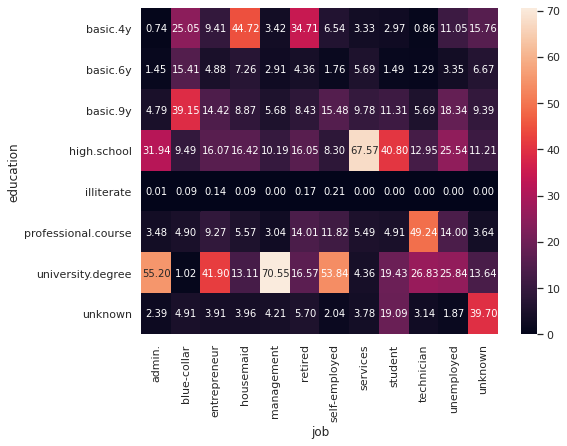

In [154]:
#CrossTab between Job and Education. A nice Correlation
plt.subplots(figsize=(8,6))
sns.heatmap(pd.crosstab(df['education'],df['job']).apply(lambda r:r/r.sum()*100, axis=0),annot=True, fmt='.2f')
plt.show()

In [155]:
a = pd.crosstab(df['job'],df['education']).apply(lambda r:r/r.sum()*100, axis=1).drop('unknown',axis=0)
job_list = list(a.index.values)
job_list

['admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed']

In [156]:
import random as rd
#Replacing Unknown job values to simulate Real World
for edu in pd.unique(df['education']): 
    df.loc[(df['education']==edu) & (df['job']=='unknown'), 'job'] = \
                   rd.choices(job_list, weights = a[edu]/100,
                   k=len(df.loc[(df['education']==edu) & (df['job']=='unknown'), 'job']))

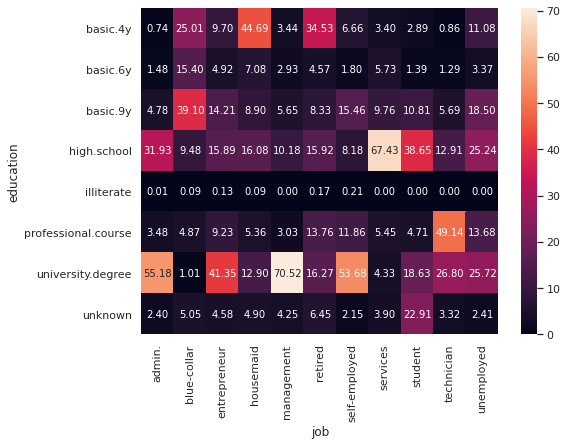

In [157]:
#CrossTab between Education and Job. A nice Correlation. We're replacing unknown Education Values
plt.subplots(figsize=(8,6))
sns.heatmap(pd.crosstab(df['education'],df['job']).apply(lambda r:r/r.sum()*100, axis=0),annot=True, fmt='.2f')
plt.show()

In [158]:
a = pd.crosstab(df['marital'],df['job']).apply(lambda r:r/r.sum()*100, axis=1).drop('unknown', axis=0)
edu_list = a.index.values
edu_list

array(['divorced', 'married', 'single'], dtype=object)

In [159]:
#Replacing Unkown Education Values
for job in pd.unique(df['job']):
    df.loc[(df['education']=='unknown')&(df['job']==job),'education'] = \
         rd.choices(edu_list, weights = a[job]/100, 
         k = len(df.loc[(df['education']=='unknown')&(df['job']==job),'education']))

Hence we've properly replaced the unknown values in both job and education by effectively simulating real life using weighted random allotment!

####**Marriage**

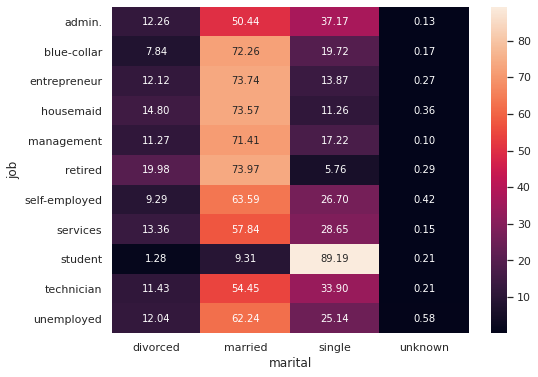

In [160]:
#Neat Correlation between Job and Marriage
plt.subplots(figsize=(8,6))
sns.heatmap(pd.crosstab(df['job'],df['marital']).apply(lambda r: r/r.sum()*100, axis=1), annot = True, fmt = '1.2f')
plt.show()

In [161]:
a = pd.crosstab(df['marital'],df['job']).apply(lambda r:r/r.sum()*100, axis=1).drop('unknown', axis=0)
marital_list = a.index.values
marital_list

array(['divorced', 'married', 'single'], dtype=object)

In [162]:
#Replacing Unkown Marital Values
for job in pd.unique(df['job']):
    df.loc[(df['marital']=='unknown')&(df['job']==job),'marital'] = \
         rd.choices(marital_list, weights = a[job]/100, 
         k = len(df.loc[(df['marital']=='unknown')&(df['job']==job),'marital']))

In [163]:
#Replacing Unknown Loan Values.
weight = df['loan'].value_counts()/df['loan'].value_counts().sum()
df.loc[df['loan']=='unknown','loan'] = rd.choices(pd.unique(df['loan']), weights = weight,\
                                                  k = len(df.loc[df['loan']=='unknown','loan']))

In [164]:
#Replacing Unknown Housing Values.
weight = df['housing'].value_counts()/df['housing'].value_counts().sum()
df.loc[df['housing']=='unknown','housing'] = rd.choices(pd.unique(df['housing']), weights = weight,\
                                                  k = len(df.loc[df['housing']=='unknown','housing']))

In [165]:
df.loc[df['housing']=='unknown','housing']

975      unknown
4107     unknown
4233     unknown
4455     unknown
6292     unknown
9219     unknown
10013    unknown
11010    unknown
11840    unknown
12173    unknown
13189    unknown
16943    unknown
19384    unknown
22268    unknown
34656    unknown
37934    unknown
38384    unknown
40530    unknown
40832    unknown
Name: housing, dtype: object

We cannot replace unknown Default values because the number of unknown values is on an average much more than the number of values of yes. And also the knowledge of someone's default status seems tough to know and even if we try to know it, the resources we spend to know it would be more than what we get out of knowing the fact to target the person. Opportunity cost is high.

###**Feature Engineering of pdays**

In [166]:
#We can try to replace p-days by a categorical variable age slot them into bins
#Depending upon the the value of the variable pdays.
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_12'] = 0
df['pdays_bet_5_12'] = 0
df.loc[df['pdays']==999,'pdays_missing'] = 1
df.loc[df['pdays']<=5,'pdays_less_5'] = 1
df.loc[(df['pdays']>12) & (df['pdays']<999),'pdays_greater_12'] = 1
df.loc[(df['pdays']>5)&(df['pdays']<=12),'pdays_bet_5_12']= 1
df.drop('pdays', axis=1, inplace = True)

In [170]:
display(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_12,pdays_bet_5_12
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,1,0,0,0


In [176]:
df_ml = df.copy()
df_ml.drop(["duration","loan","marital","education",'day_of_week'],axis=1, inplace=True)
cat_columns=['job','default','housing','contact','month','poutcome','y']
dummy_cols = pd.get_dummies(df[cat_columns])

df_ml = pd.concat([df_ml.drop(cat_columns, axis =1), dummy_cols] , axis=1)
display(df_ml)

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_missing,pdays_less_5,pdays_greater_12,pdays_bet_5_12,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Our Exploratory and Descriptive data analysis tells us that we should target:


*   Retirees and people whose age is >56
*   Students who have completed atleast high school education
*   People involved in white-collar jobs.

Practices to be followed:

*   Calling for a followu



In [177]:
#Feature Normalisation
X = df_ml.drop('y', axis=1)
y = df_ml['y']
m,n = X.shape

continuous = ['age','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
for col in continuous:
    mu = X[col].mean()
    std = X[col].std()
    X[col]-=mu
    X[col]/=std

In [178]:
X

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_missing,pdays_less_5,pdays_greater_12,pdays_bet_5_12,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533016,-0.565915,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1.628973,-0.565915,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-0.290182,-0.565915,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,-0.002309,-0.565915,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1.533016,-0.565915,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164298,-0.565915,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
41184,0.573438,-0.565915,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
41185,1.533016,-0.204906,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
41186,0.381522,-0.565915,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


**Model Selections** 

<ol>
1) Logistic Classification

2) SVM Classifier

3) Random Forests Classifier

4) Neural Network Classifier
</ol>

In [179]:
from sklearn.model_selection import train_test_split

#Going to Use a 60-20-20 Train-CV-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,\
                                                    random_state = 1)

In [180]:
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

##**Logistic Regression**

In [181]:
#Defining Model 1: Logistic Regression
logi_model = LogisticRegression(max_iter = 1000, solver='saga')

#Defining Search Space
space = {}
space['C'] = [0.1,0.2,0.5,1,2,5,10]

#Defining Cross Validation Set
cv = RepeatedKFold(n_splits = 4, n_repeats =1)

#Hyperparameter Search Begins
search = GridSearchCV(logi_model, space, n_jobs=-1, cv=cv, scoring = 'f1')

result = search.fit(X_train, y_train)
result.best_params_

{'C': 10}

In [182]:
#Testing the Best LOGISTIC REGRESSION MODEL
model= LogisticRegression(max_iter=1000, solver='saga', C=5)
model.fit(X_train, y_train)
y_test_pred= model.predict(X_test)

accuracy =  accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix))

Accuracy = 0.897669
F1 Score = 0.328287
Precision = 0.662379
Recall = 0.218220
      0    1
0  7189  105
1   738  206


##**Neural Network**

In [183]:
#Defining Model: NEURAL NETWORK CLASSIFIER
nnmodel = MLPClassifier(max_iter = 1500, solver ='adam')

#Defining Search Space
space={}
space['hidden_layer_sizes'] = [(100,),(75,75),(200,)] 
space['alpha'] = [0.05,0.1,0.5,1,5]

#Defining Cross Validation Set
cv = RepeatedKFold(n_splits =4, n_repeats =1)

#Search Begisns
search = GridSearchCV(nnmodel, space, cv=cv, n_jobs=-1, scoring='f1')

result = search.fit(X_train, y_train)
result.best_params_

{'alpha': 0.05, 'hidden_layer_sizes': (75, 75)}

In [187]:
#Testing Best NEURAL NETWORK ARCHITECTURE
model= MLPClassifier(max_iter=1500, solver='adam', alpha=0.05, hidden_layer_sizes=(200,))
model.fit(X_train, y_train)
y_test_pred= model.predict(X_test)

accuracy =  accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix))

Accuracy = 0.897791
F1 Score = 0.374443
Precision = 0.626866
Recall = 0.266949
      0    1
0  7144  150
1   692  252


##**Random Forest Classifier**

In [185]:
#Defining Model Random Forest Classifier
rfmodel = RandomForestClassifier()

#Defining Search Space
space={}
space['max_depth'] = np.arange(6,20)
space['n_estimators'] = [50,100,150,200]

#Defining Cross Validation Set
cv = RepeatedKFold(n_splits = 4, n_repeats = 1)

#Search Begins
search = GridSearchCV(rfmodel, space,cv=cv, n_jobs=-1, scoring='f1')

result = search.fit(X_train, y_train)
result.best_params_

{'max_depth': 19, 'n_estimators': 150}

In [188]:
#Testing Best RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(max_depth = 19, n_estimators = 100)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix))

Accuracy = 0.895484
F1 Score = 0.395789
Precision = 0.586279
Recall = 0.298729
      0    1
0  7095  199
1   662  282


##**Support Vector Machines**

In [189]:
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import Nystroem

#Defining Model: Support Vector Machines
svcmodel = LinearSVC(max_iter=4000)

#Defining Search Space
space={}
space['C'] = [0.1,0.2,0.5,1,2,5,10]

#Defining Cross Validation Set
cv = RepeatedKFold(n_splits=4, n_repeats=1)

#Search Begins
search = GridSearchCV(svcmodel, space, cv=cv, n_jobs=-1, scoring='f1')

#Kernelisation of Input X
featuremap = Nystroem(gamma = 0.2, n_components = 70, random_state = 1)
X_kernelised = featuremap.fit_transform(X_train)

result = search.fit(X_train, y_train)
result.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'C': 2}

In [191]:
#Kernelising X_test
X_test_kernelised = featuremap.fit_transform(X_test)

#Testing The SVM CLASSIFIER MODEL
model = LinearSVC(dual=False, C=10, max_iter=2500)
model.fit(X_kernelised, y_train)
y_test_pred = model.predict(X_test_kernelised)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix))

Accuracy = 0.839039
F1 Score = 0.077886
Precision = 0.113360
Recall = 0.059322
      0    1
0  6856  438
1   888   56


##**Feature Engineering 2**

Our Original Dataset had a severe class imbalance, to make up for it what we can do is instead of using the original feature dataset we can repeat the datapoints for y=1 so that y=0 and y=1 are roughly equal so as to minimise class imbalance and randomise the dataframe so as to not make our model biased and ensure that each datapoint creates an independent effect on the model without being influenced by a prior datapoint. 

As we've seen in our Exploratory Data Ana;ysis that the ratio of No's to Yes's is around 8:1, so we can repeat the datapoints with 'y=1' 7 more times to get roughly, a 1:1 ratio

In [192]:
dfml_yes = df_ml[df_ml['y']==1]

df_ml2 = df_ml.copy()
for i in range(7):
    df_ml2 = df_ml2.append(dfml_yes)

df_ml2

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_missing,pdays_less_5,pdays_greater_12,pdays_bet_5_12,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,1,6,-1.1,94.767,-50.8,1.031,4963.6,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
41178,62,2,3,-1.1,94.767,-50.8,1.031,4963.6,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
41181,37,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


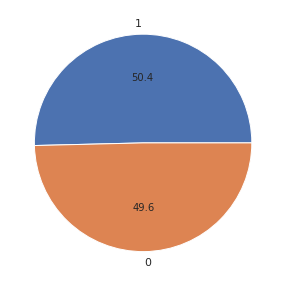

In [193]:
plt.pie(df_ml2['y'].value_counts(), labels= df_ml2['y'].value_counts().index, autopct = '%1.1f')
plt.show()

In [195]:
#Randomising the Rows of df_ml2 so that the model is not biased
df_ml2 = df_ml2.sample(frac=1).reset_index(drop=True)
df_ml2

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_missing,pdays_less_5,pdays_greater_12,pdays_bet_5_12,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,35,5,0,-3.4,92.431,-26.9,0.733,5017.5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,58,1,1,-1.8,93.749,-34.6,0.644,5008.7,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,60,2,2,-2.9,92.469,-33.6,1.072,5076.2,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,29,1,2,-1.1,94.199,-37.5,0.879,4963.6,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,29,2,1,-1.8,92.893,-46.2,1.281,5099.1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73663,28,2,0,-1.8,92.893,-46.2,1.259,5099.1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
73664,30,1,0,1.4,93.444,-36.1,4.963,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
73665,46,2,4,-1.7,94.027,-38.3,0.904,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
73666,48,3,1,-0.1,93.200,-42.0,4.021,5195.8,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [196]:
X2 = df_ml2.drop('y', axis=1)
y2 = df_ml2['y']
m,n = X2.shape

continuous = ['age','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
for col in continuous:
    mu = X2[col].mean()
    std = X2[col].std()
    X2[col]-=mu
    X2[col]/=std

In [198]:
#Going to Use a 60-20-20 Train-CV-Test Split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2,\
                                                    random_state = 2)

###**Logistic Regression**

In [199]:
#Defining Model 1: Logistic Regression
logi_model = LogisticRegression(max_iter = 1000, solver='saga')

#Defining Search Space
space = {}
space['C'] = [0.02,0.1,0.2,0.5,1,2,5,10]

#Defining Cross Validation Set
cv = RepeatedKFold(n_splits = 4, n_repeats =1)

#Hyperparameter Searcg Begins
search = GridSearchCV(logi_model, space, n_jobs=-1, cv=cv, scoring = 'f1')

result = search.fit(X_train, y_train)
result.best_params_

{'C': 0.02}

In [200]:
#Testing the Best LOGISTIC REGRESSION MODEL
model= LogisticRegression(max_iter=1000, solver='saga', C=0.1)
model.fit(X_train, y_train)
y_test_pred= model.predict(X_test)

accuracy =  accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix))

Accuracy = 0.742704
F1 Score = 0.711557
Precision = 0.815913
Recall = 0.630869
      0     1
0  6267  1055
1  2736  4676


###**Neural Network**

In [201]:
#Defining Model: NEURAL NETWORK CLASSIFIER
nnmodel = MLPClassifier(max_iter = 1500, solver ='adam')

#Defining Search Space
space={}
space['hidden_layer_sizes'] = [(100,),(75,75),(200,),(125,125)] 

#Defining Cross Validation Set
cv = RepeatedKFold(n_splits =4, n_repeats =1)

#Search Begisns
search = GridSearchCV(nnmodel, space, cv=cv, n_jobs=-1, scoring='f1')

result = search.fit(X_train, y_train)
result.best_params_

{'hidden_layer_sizes': (125, 125)}

In [202]:
#Testing Best NEURAL NETWORK ARCHITECTURE
model= MLPClassifier(max_iter=1500, solver='adam', alpha=0.05, hidden_layer_sizes=(200,))
model.fit(X_train, y_train)
y_test_pred= model.predict(X_test)

accuracy =  accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix))

Accuracy = 0.765780
F1 Score = 0.742674
Precision = 0.830138
Recall = 0.671883
      0     1
0  6303  1019
1  2432  4980


###**Random Forest Classifier**

In [203]:
#Defining Model: Random Forest Classifier
rfmodel = RandomForestClassifier()

#Defining Search Space
space={}
space['max_depth'] = np.arange(6,20)
space['n_estimators'] = [50,100,150,200]

#Defining Cross Validation Set
cv = RepeatedKFold(n_splits = 4, n_repeats = 1)

#Search Begins
search = GridSearchCV(rfmodel, space,cv=cv, n_jobs=-1, scoring='f1')

result = search.fit(X_train, y_train)
result.best_params_

{'max_depth': 19, 'n_estimators': 50}

In [204]:
#Testing Best RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(max_depth = 19, n_estimators = 100)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Accuracy = %f"%accuracy)
print('F1 Score = %f'%f1)
print("Precision = %f"%precision)
print("Recall = %f"%recall)
print(pd.DataFrame(conf_matrix))

Accuracy = 0.894122
F1 Score = 0.894352
Precision = 0.897879
Recall = 0.890853
      0     1
0  6571   751
1   809  6603
